In [1073]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Load environment variables
from dotenv import load_dotenv
from pathlib import Path

# Load .env file from general directory
env_path = Path('../../general/.env')
load_dotenv(env_path);

In [1074]:
# Get path from environment variables
path_prop = os.getenv('path_prop')

# Use the path from environment
path = path_prop

In [1075]:
# read all csv files in the folder
all_files = glob.glob(os.path.join(path_prop, "*.csv"))

# create an empty list to store dataframes
dfs = []

# loop through all files and read them into a dataframe
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=';')
    dfs.append(df)

# concatenate all dataframes into one
df = pd.concat(dfs, axis=0, ignore_index=True)

# drop duplicates
df = df.drop_duplicates()

# df.tail(3)

In [1076]:
df.shape

(11817, 23)

In [1077]:
# df.tail(20)

In [1078]:
df.columns

Index(['Ticket', 'Apri', 'Tipologia', 'Volume', 'Simbolo', 'Prezzo', 'SL',
       'TP', 'Chiudi', 'Prezzo.1', 'Swap', 'Commissioni', 'Profitto', 'Pips',
       'Duratadeltradeinsecondi', 'Account_Type', 'Account_Amount',
       'Profit_pct', 'Month', 'Year', 'Asset', 'Prop', 'Day'],
      dtype='object')

In [1079]:
# from column Ticket, drop duplicates and keep the first occurrence
# Is required especially for 5%, FNEXT and MyFX where there is no account reset
df = df.drop_duplicates(subset=['Ticket'], keep='first')

# drop Ticket
# df = df.drop(columns=['Ticket'])

In [1080]:
df.shape

(11817, 23)

In [1081]:
# df.sample(3)
# df.tail(3) 

In [1082]:
# 'Tipologia' column, uppercase
df['Tipologia'] = df['Tipologia'].str.upper()

# # Check 'Tipologia' column for unique values
# unique_values = df['Tipologia'].unique()
# unique_values

In [1083]:
# rename values in column Simbolo
df['Simbolo'] = df['Simbolo'].replace({'US100.cash': 'US100',
                                        'NAS100': 'US100', 
                                       'UK100.cash' : 'UK100',
                                        'FRA40.cash': 'FRA40',
                                        'USOIL.cash': 'USOIL',
                                        'USOUSD': 'USOIL',
                                        'XBRUSD': 'USOIL',
                                        'UKOIL.cash': 'UKOIL',
                                       'US500.cash': 'US500',
                                        'SP500': 'US500', 
                                       'US30.cash': 'US30', 
                                       'US2000.cash': 'US2000', 
                                       'SPX500': 'US500', 
                                       'NDX100': 'US100',
                                        'SPN35.cash': 'SPN35',
                                       'GER30': 'GER40',
                                        'DAX40': 'GER40',
                                        'JP225.cash': 'JP225',
                                       'GER40.cash': 'GER40'})

In [1084]:
# unique values column Simbolo
# list of assets
df['Simbolo'].unique()

array(['US30', 'US500', 'GER40', 'EURUSD', 'BTCUSD', 'CADJPY', 'AUDJPY',
       'USDCAD', 'EURJPY', 'US100', 'TSLA', 'RACE', 'MSFT', 'AAPL',
       'AMZN', 'ZM', 'META', 'NVDA', 'GOOG', 'V', 'GBPUSD', 'ETHUSD',
       'BAC', 'AUDUSD', 'XAUUSD', 'NFLX', 'FRA40', 'XAGUSD', 'BABA',
       'USOIL', 'GBPJPY', 'CHFJPY', 'USDJPY', 'EURCHF', 'US2000', 'LVMH',
       'USDCHF', 'AUDCAD', 'PFE', 'UK100', 'EURGBP', 'EURCAD', 'WMT',
       'SPN35', 'DOGEUSD', 'NZDUSD', 'NZDJPY', 'GBPCAD', 'UKOIL',
       'DOGUSD', 'LTCUSD', 'JP225', 'EUSTX50', 'AUDCHF', 'GBPNZD', 'T'],
      dtype=object)

In [1085]:
# Calculate the total profit for each symbol
best_simbol = df.groupby('Simbolo')['Profitto'].sum().sort_values(ascending=False).round(2) 

# Convert the result to a DataFrame
best_simbol = best_simbol.reset_index()

# Rename the columns
best_simbol.columns = ['Simbolo', 'Profitto']

# Display the result
best_simbol.head(10)

,Simbolo,Profitto
0,US100,54523.61
1,BTCUSD,9559.70
2,XAUUSD,9036.67
3,US30,8970.33
4,XAGUSD,6885.00
5,GER40,5383.94
6,NVDA,5158.12
7,CHFJPY,3016.35
8,NFLX,2518.49
9,USDCAD,2372.03


In [1086]:
# worst symbols
worst_simbol =  best_simbol.sort_values(by='Profitto', ascending=True).head(10)
worst_simbol

,Simbolo,Profitto
55,USDJPY,-8239.41
54,MSFT,-6451.22
53,US500,-5777.50
52,TSLA,-3793.56
51,USDCHF,-2588.80
50,GOOG,-1247.72
49,NZDJPY,-1090.96
48,ETHUSD,-992.94
47,US2000,-932.58
46,GBPCAD,-905.32


In [1087]:
# Calculate total profit from column 'Profitto'
total_profit = df['Profitto'].sum().round(2)

# Display the result
total_profit

np.float64(80934.01)

In [1088]:
# Calculate cumulative profit for each Asset
cumulative_profit_asset = df.groupby('Asset')['Profitto'].sum().reset_index()

# Rename the columns
cumulative_profit_asset.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset = cumulative_profit_asset.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset

,Asset,Cumulative_Profit
3,Indexes,60935.26
0,Commodities,17344.28
1,Crypto,8444.06
4,Stocks,2283.30
2,Forex,-8072.89


In [1089]:
# # Fix Unknown in column Asset

# # check Unknown in column Asset
# df[df['Asset'] == 'Unknown']

# """
# df.Simbolo == 'GBPNZD' -> df.Asset == 'Forex'
# df.Simbolo == 'T' -> df.Asset == 'Stocks'
# """
# # fix Unknown in column Asset
# df.loc[df['Simbolo'] == 'GBPNZD', 'Asset'] = 'Forex'
# df.loc[df['Simbolo'] == 'T', 'Asset'] = 'Stocks'

In [1090]:
# # check df['Asset'] == Unknown
# df[df['Asset'] == 'Unknown']

In [1091]:
# First method to calculate the average profit per trade for each symbol
best_simbol_avg = df.groupby('Simbolo')['Profitto'].mean().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_avg = best_simbol_avg.reset_index()

# Rename the columns
best_simbol_avg.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg.head(10)

,Simbolo,Average_Profit
0,XAGUSD,6885.00
1,LVMH,148.29
2,USOIL,76.73
3,NVDA,37.11
4,US100,32.69
5,DOGUSD,27.68
6,AUDCAD,26.69
7,META,21.78
8,XAUUSD,19.02
9,GBPJPY,18.92


In [1092]:
# Second method to calculate the average profit per trade for each symbol

# Calculate the number of trades for each symbol
trades_count = df.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)
trades_count.head(10)

# Calculate the profit for each symbol
best_simbol_avg2 = best_simbol.set_index('Simbolo')['Profitto'] / trades_count
best_simbol_avg2.sort_values(ascending=False).round(2).head(10)

# Convert the result to a DataFrame
best_simbol_avg2 = best_simbol_avg2.reset_index()

# Rename the columns
best_simbol_avg2.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg2.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit
53,XAGUSD,6885.000000
29,LVMH,148.288333
50,USOIL,76.734762
33,NVDA,37.108777
43,US100,32.688016
12,DOGUSD,27.676250
2,AUDCAD,26.690000
30,META,21.781829
54,XAUUSD,19.024568
22,GBPJPY,18.920566


In [1093]:
# Convert trades_count to DataFrame
trades_count_df = trades_count.reset_index()

# Rename the columns
trades_count_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df = pd.merge(best_simbol_avg, trades_count_df, on='Simbolo')

# Display the merged DataFrame
merged_df.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
0,XAGUSD,6885.00,1
1,LVMH,148.29,6
2,USOIL,76.73,21
3,NVDA,37.11,139
4,US100,32.69,1668
5,DOGUSD,27.68,8
6,AUDCAD,26.69,3
7,META,21.78,82
8,XAUUSD,19.02,475
9,GBPJPY,18.92,53


In [1094]:
# Create a copy of the dataframe
# df_100 will be the dataset used as a reference for the calculations 
# (virtual balance 100k USD)

# With this scenario, we will simulate how all strategies applied to the 100k 
# account would have performed

df_100 = df.copy()

# Add the column Profitto_100 with calculated values 
# (virtual profit on 100k USD balance)
df_100['Profitto_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Profitto'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Profitto'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Profitto'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Profitto'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Profitto'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Profitto'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Profitto'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

In [1095]:
# Check the new column and profitto column
df_100[['Profitto', 'Account_Amount', 'Profitto_100']].sample(10)

,Profitto,Account_Amount,Profitto_100
9846,-204.18,100000,-204.18
2160,3037.12,200000,1518.56
2497,-83.63,50000,-167.26
10204,-58.34,100000,-58.34
6868,-79.30,100000,-79.30
6044,-45.14,50000,-90.28
11627,-48.34,50000,-96.68
10932,0.01,20000,0.05
1222,15.75,20000,78.75
3102,-220.54,50000,-441.08


### Trades Commissions Analysis

In [1096]:
# Add the column Profitto_100 with calculated values 
# (virtual profit on 100k USD balance)
df_100['Swap_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Swap'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Swap'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Swap'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Swap'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Swap'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Swap'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Swap'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

# Add the column Profitto_100 with calculated values (virtual profit on 100k USD balance)
df_100['Commissioni_100'] = np.where(
    df_100['Account_Amount'] == 5000, df_100['Commissioni'] * 20,
    np.where(
        df_100['Account_Amount'] == 20000, df_100['Commissioni'] * 5,
        np.where(
            df_100['Account_Amount'] == 25000, df_100['Commissioni'] * 4,
            np.where(
                df_100['Account_Amount'] == 40000, df_100['Commissioni'] * 2.5,
                np.where(
                    df_100['Account_Amount'] == 50000, df_100['Commissioni'] * 2,
                    np.where(
                        df_100['Account_Amount'] == 100000, df_100['Commissioni'] * 1,
                        np.where(
                            df_100['Account_Amount'] == 200000, df_100['Commissioni'] / 2,
                            np.nan  # Handle unexpected values
                        )
                    )
                )
            )
        )
    )
)

# Add column 'Tot_Commissioni_100' as sum of 'Commissioni_100' and 'Swap_100'
df_100['Tot_Commissioni_100'] = df_100['Commissioni_100'] + df_100['Swap_100']

In [1097]:
# Check columns
df_100[['Commissioni', 'Swap', 'Account_Amount','Commissioni_100', 'Swap_100', 'Tot_Commissioni_100']].sample(10)

,Commissioni,Swap,Account_Amount,Commissioni_100,Swap_100,Tot_Commissioni_100
10701,-0.66,0.00,100000,-0.66,0.00,-0.66
10720,-0.24,-2.45,100000,-0.24,-2.45,-2.69
7778,-0.68,0.00,100000,-0.68,0.00,-0.68
1686,0.00,-24.32,100000,0.00,-24.32,-24.32
6505,0.00,0.00,100000,0.00,0.00,0.00
5949,0.00,0.00,50000,0.00,0.00,0.00
7073,0.00,0.00,100000,0.00,0.00,0.00
10823,-0.72,0.97,100000,-0.72,0.97,0.25
7564,0.00,0.00,100000,0.00,0.00,0.00
9013,0.00,0.00,50000,0.00,0.00,0.00


In [1098]:
# drop Commissioni_100	Swap_100
df_100 = df_100.drop(columns=['Commissioni_100', 'Swap_100'])

# Column Profitto_100 is sum of Profitto_100 and Tot_Commissioni_100
df_100['Profitto_100'] = df_100['Profitto_100'] + df_100['Tot_Commissioni_100']

### From here on, analysis of the trade commissions data is completed.

In [1099]:
# drop rows where Profitto_100 is in range -1/1$
# it decreases the average profit for trades made mostly manually 
# to check the account performance
# df_100 = df_100[(df_100['Profitto_100'] < -1) & (df_100['Profitto_100'] > 1)]

In [1100]:
# rename Account_Amount_100 to Profitto_100
# df_100.rename(columns={'Account_Amount_100': 'Profitto_100'}, inplace=True)

In [1101]:
# Calculate the total profit for each symbol of df_100
best_simbol_100 = df_100.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_100 = best_simbol_100.reset_index()

# Rename the columns
best_simbol_100.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_100.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,US100,68111.42
1,US30,25139.10
2,GER40,12406.15
3,XAUUSD,9845.38
4,META,8972.31
5,BTCUSD,7613.36
6,XAGUSD,6877.91
7,NVDA,6160.75
8,AAPL,4604.49
9,USDCAD,3961.37


In [1102]:
# worst symbols of df_100
best_simbol_100.tail(10)

,Simbolo,Profitto ($)
46,US2000,-1320.68
47,AUDJPY,-1398.85
48,GBPUSD,-1649.76
49,GOOG,-3289.24
50,USDCHF,-3495.45
51,EURJPY,-4338.77
52,USOIL,-5330.82
53,MSFT,-5545.47
54,USDJPY,-7015.82
55,US500,-12967.83


### List of the best symbols

In [1103]:
# df forex from df_100 where Asset == Forex
df_forex = df_100[df_100['Asset'] == 'Forex']

# Calculate the total profit for each symbol of df_forex
best_simbol_forex = df_forex.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_forex = best_simbol_forex.reset_index()

# Rename the columns
best_simbol_forex.columns = ['Simbolo', 'Profitto ($)']

# Display the result
best_simbol_forex.sort_values(by='Profitto ($)', ascending=False).head(10)

,Simbolo,Profitto ($)
0,USDCAD,3961.37
1,EURUSD,2863.69
2,CHFJPY,1902.39
3,GBPJPY,423.41
4,AUDCAD,137.60
5,NZDUSD,95.99
6,GBPNZD,29.05
7,AUDCHF,-0.22
8,EURCHF,-12.59
9,EURGBP,-63.22


In [1104]:
# worst_simbol_forex
worst_simbol_forex = best_simbol_forex.sort_values(by='Profitto ($)', ascending=True).head(10)
worst_simbol_forex

,Simbolo,Profitto ($)
19,USDJPY,-7015.82
18,EURJPY,-4338.77
17,USDCHF,-3495.45
16,GBPUSD,-1649.76
15,AUDJPY,-1398.85
14,NZDJPY,-1155.27
13,CADJPY,-930.19
12,GBPCAD,-918.55
11,EURCAD,-199.42
10,AUDUSD,-158.10


In [ ]:
# virtual profit from all the bots

# Calculate total profit from column 'Profitto_100'
total_profit_100 = df_100['Profitto_100'].sum().round(2)

# Display the result
total_profit_100

np.float64(109572.34)

In [ ]:
# sum of profits for each asset
cumulative_profit_asset_100 = df_100.groupby('Asset')['Profitto_100'].sum().reset_index()

# Rename the columns
cumulative_profit_asset_100.columns = ['Asset', 'Cumulative_Profit']

# sort values by Cumulative_Profit
cumulative_profit_asset_100 = cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False)

# Display the result
cumulative_profit_asset_100.sort_values(by='Cumulative_Profit', ascending=False).head(10)

,Asset,Cumulative_Profit
3,Indexes,89640.250
4,Stocks,14538.305
0,Commodities,11168.035
1,Crypto,6148.455
2,Forex,-11922.710


In [ ]:
# Second method to calculate the average profit per trade for each symbol of df_100

# Calculate the number of trades for each symbol
trades_count_100 = df_100.groupby('Simbolo')['Ticket'].count().sort_values(ascending=False)

# Calculate the profit for each symbol
best_simbol_avg_100 = best_simbol_100.set_index('Simbolo')['Profitto ($)'] / trades_count_100

# Convert the result to a DataFrame
best_simbol_avg_100 = best_simbol_avg_100.reset_index()

# Rename the columns
best_simbol_avg_100.columns = ['Simbolo', 'Average_Profit']

# Display the result
best_simbol_avg_100.sort_values(by='Average_Profit', ascending=False).head(10)  

,Simbolo,Average_Profit
53,XAGUSD,6877.910000
29,LVMH,261.083333
30,META,109.418415
2,AUDCAD,45.866667
33,NVDA,44.321942
43,US100,40.834185
45,US30,35.012674
0,AAPL,31.323061
12,DOGUSD,27.676250
54,XAUUSD,20.727116


In [1108]:
# Convert trades_count to DataFrame
trades_count_100_df = trades_count_100.reset_index()

# Rename the columns
trades_count_100_df.columns = ['Simbolo', 'Trades_Count']

# Merge the two DataFrames on 'Simbolo'
merged_df_100 = pd.merge(best_simbol_avg_100, trades_count_100_df, on='Simbolo')

# Display the merged DataFrame
merged_df_100.sort_values(by='Average_Profit', ascending=False).head(10)

,Simbolo,Average_Profit,Trades_Count
53,XAGUSD,6877.910000,1
29,LVMH,261.083333,6
30,META,109.418415,82
2,AUDCAD,45.866667,3
33,NVDA,44.321942,139
43,US100,40.834185,1668
45,US30,35.012674,718
0,AAPL,31.323061,147
12,DOGUSD,27.676250,8
54,XAUUSD,20.727116,475


## Below cell is important for the calculation of the daily returns

In [1109]:
# Use the below row for further analysis on the current ipynb file (no for quantstats library)
df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000) * 100

# # Use the below row for further analysis on quantstats library
# # quantstats library use different format for daily resturns
# # every time are added new data, 
# # new daily_returns_spy and daily_returns_strategy need to be calculated 
# # and downloaded as csv for further analysis
# df_100['Profit_pct_100'] = (df_100['Profitto_100'] / 100000)


In [1110]:
# Check the new column and profitto column
df_100[['Profitto_100', 'Account_Amount', 'Profit_pct_100']].sample(10)

,Profitto_100,Account_Amount,Profit_pct_100
5464,-96.720,100000,-0.096720
850,233.200,20000,0.233200
11110,-38.280,50000,-0.038280
2215,2593.325,40000,2.593325
9666,66.840,100000,0.066840
5250,18.760,50000,0.018760
6850,65.520,100000,0.065520
7357,24.500,100000,0.024500
4967,242.260,100000,0.242260
1615,33.710,100000,0.033710


In [1112]:
df_dates = df_100.copy()

In [1114]:
# group df_dates by Year and Month
df_dates_grouped = df_dates.groupby(['Year', 'Month']).agg({'Profitto_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped.columns = ['Year', 'Month', 'Profitto_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped.head(10)

,Year,Month,Profitto_100
0,2023,4,10150.500
1,2023,5,12434.875
2,2023,6,2756.955
3,2023,7,-6601.800
4,2023,8,122.395
5,2023,9,-13884.880
6,2023,10,1905.880
7,2023,11,16772.320
8,2023,12,2959.300
9,2024,1,-9517.740


In [1115]:
# average Profitto_100  
average_profit_per_month_usd = df_dates_grouped['Profitto_100'].mean().round(2)
average_profit_per_month_usd

np.float64(3652.41)

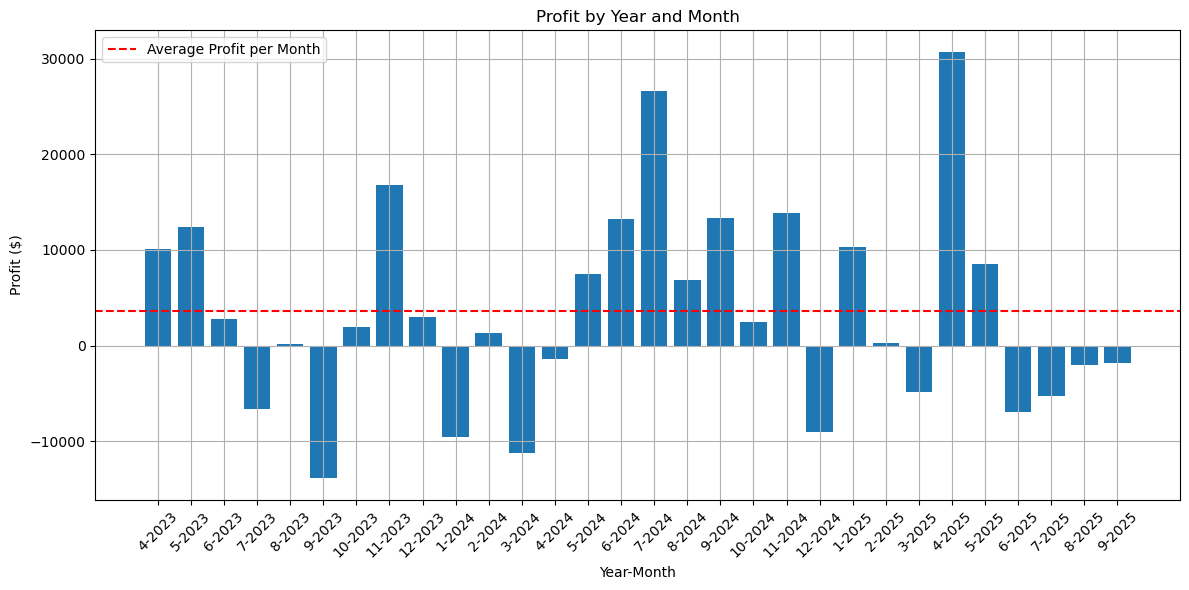

In [1116]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Profitto_100'])
plt.axhline(y=average_profit_per_month_usd, color='r', linestyle='--', label='Average Profit per Month')
plt.title('Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1117]:
# group df_dates by Year and Month
df_dates_grouped_pct = df_dates.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
df_dates_grouped_pct.head(10)

,Year,Month,Profit_pct_100
0,2023,4,10.150500
1,2023,5,12.434875
2,2023,6,2.756955
3,2023,7,-6.601800
4,2023,8,0.122395
5,2023,9,-13.884880
6,2023,10,1.905880
7,2023,11,16.772320
8,2023,12,2.959300
9,2024,1,-9.517740


In [1118]:
# average Profit_pct_100
average_profit_pct_per_month_pct = df_dates_grouped_pct['Profit_pct_100'].mean().round(2)
average_profit_pct_per_month_pct

np.float64(3.65)

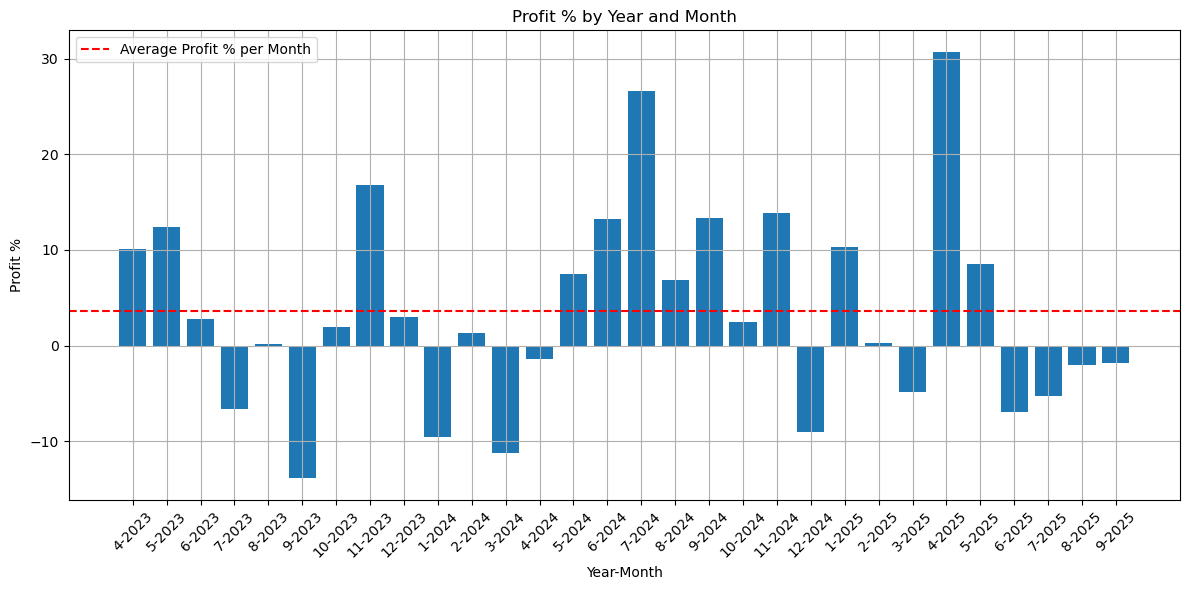

In [1119]:
## Review the below chart

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.bar(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), df_dates_grouped_pct['Profit_pct_100'])
plt.axhline(y=average_profit_pct_per_month_pct, color='r', linestyle='--', label='Average Profit % per Month')
plt.title('Profit % by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Profit %')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1120]:
# average profit per month
avg_profit_100 = df_dates_grouped.groupby('Month')['Profitto_100'].mean().reset_index()

# rename columns
avg_profit_100.columns = ['Month', 'Avg_Profitto_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100.head(12)

,Month,Avg_Profitto_100
0,1,411.650000
1,2,795.620000
2,3,-8050.405000
3,4,13166.393333
4,5,9479.605000
5,6,2995.011667
6,7,4932.106667
7,8,1651.948333
8,9,-796.453333
9,10,2207.485000


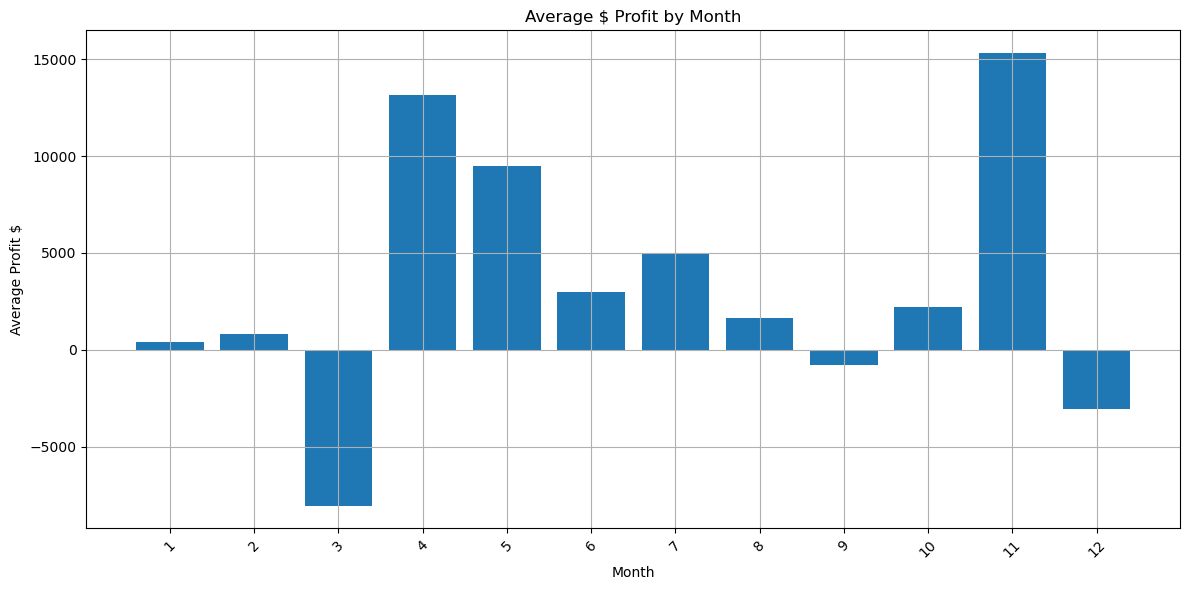

In [1121]:
# bar plot avg_profit_100 
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100['Month'].astype(str), avg_profit_100['Avg_Profitto_100'])
plt.title('Average $ Profit by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit $')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

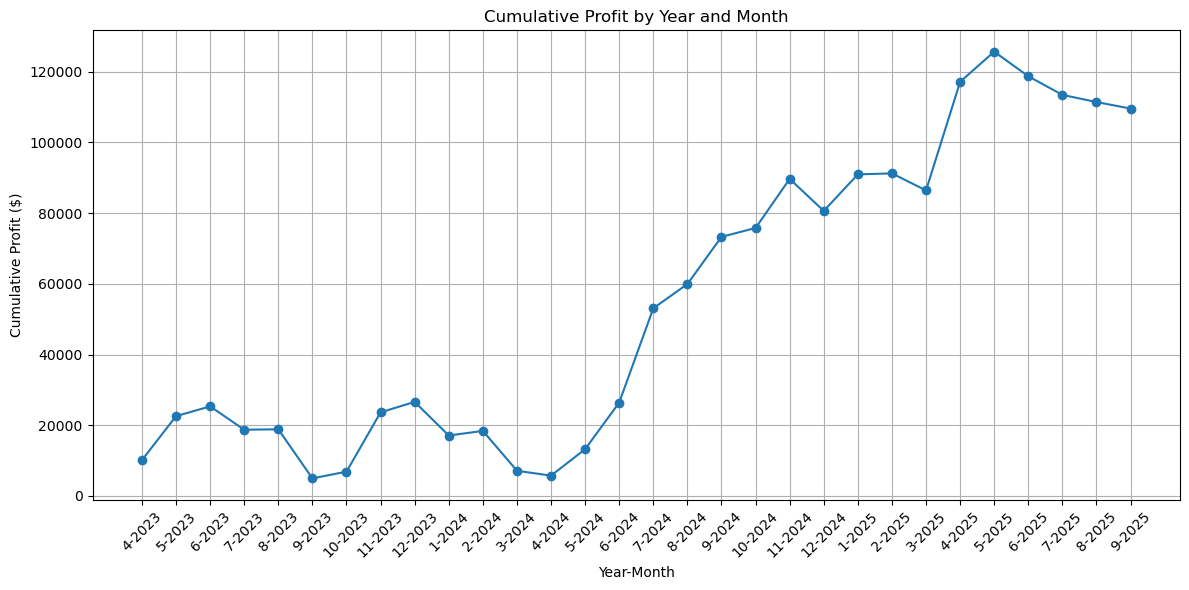

In [1122]:
# calculate cumulative profit by year and month
df_dates_grouped['Cumulative_Profit'] = df_dates_grouped['Profitto_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped['Month'].astype(str) + '-' + df_dates_grouped['Year'].astype(str), df_dates_grouped['Cumulative_Profit'], marker='o')
plt.title('Cumulative Profit by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

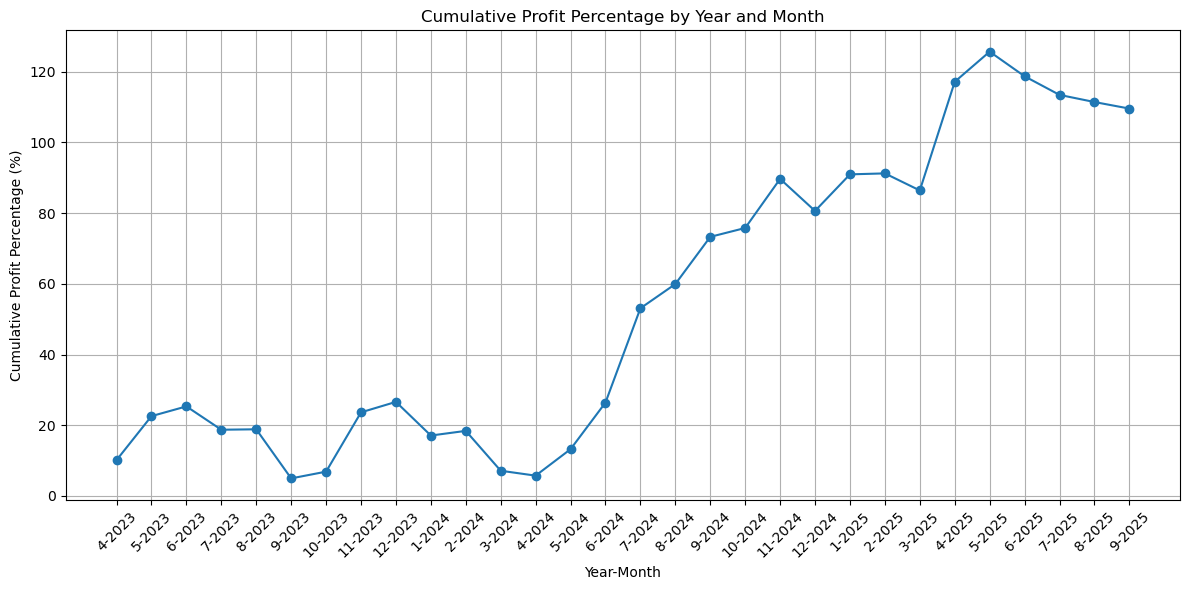

In [1124]:
df_dates_grouped_pct = df_dates.copy()

# group df_dates_grouped_pct by Year and Month
df_dates_grouped_pct = df_dates_grouped_pct.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_dates_grouped_pct.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year and month
cum_profit_pct = df_dates_grouped_pct['Profit_pct_100'].cumsum()

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_dates_grouped_pct['Month'].astype(str) + '-' + df_dates_grouped_pct['Year'].astype(str), cum_profit_pct, marker='o')
plt.title('Cumulative Profit Percentage by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [1125]:
# calculate the average profit percentage for each symbol
avg_profit_pct = df.groupby('Simbolo')['Profit_pct'].mean().sort_values(ascending=False).round(2)   

# Convert the result to a DataFrame
avg_profit_pct = avg_profit_pct.reset_index()

# Rename the columns
avg_profit_pct.columns = ['Simbolo', 'Average_Profit_Percentage']

# Display the result
avg_profit_pct.sort_values(by='Average_Profit_Percentage', ascending=False).head(10)

,Simbolo,Average_Profit_Percentage
0,XAGUSD,6.88
1,LVMH,0.28
2,META,0.12
3,AUDCAD,0.05
4,NVDA,0.05
5,US100,0.04
6,US30,0.04
7,AAPL,0.04
8,DOGUSD,0.03
9,WMT,0.02


In [ ]:
# check again

# average profit pct per month
avg_profit_100_pct = df_100.groupby('Month')['Profit_pct_100'].mean().reset_index()

# rename columns
avg_profit_100_pct.columns = ['Month', 'Avg_Profit_pct_100']

# display the first 10 rows of the grouped DataFrame
avg_profit_100_pct.head(12)

,Month,Avg_Profit_pct_100
0,1,0.000461
1,2,0.001637
2,3,-0.013576
3,4,0.040264
4,5,0.033856
5,6,0.011417
6,7,0.017086
7,8,0.008850
8,9,-0.005744
9,10,0.007395


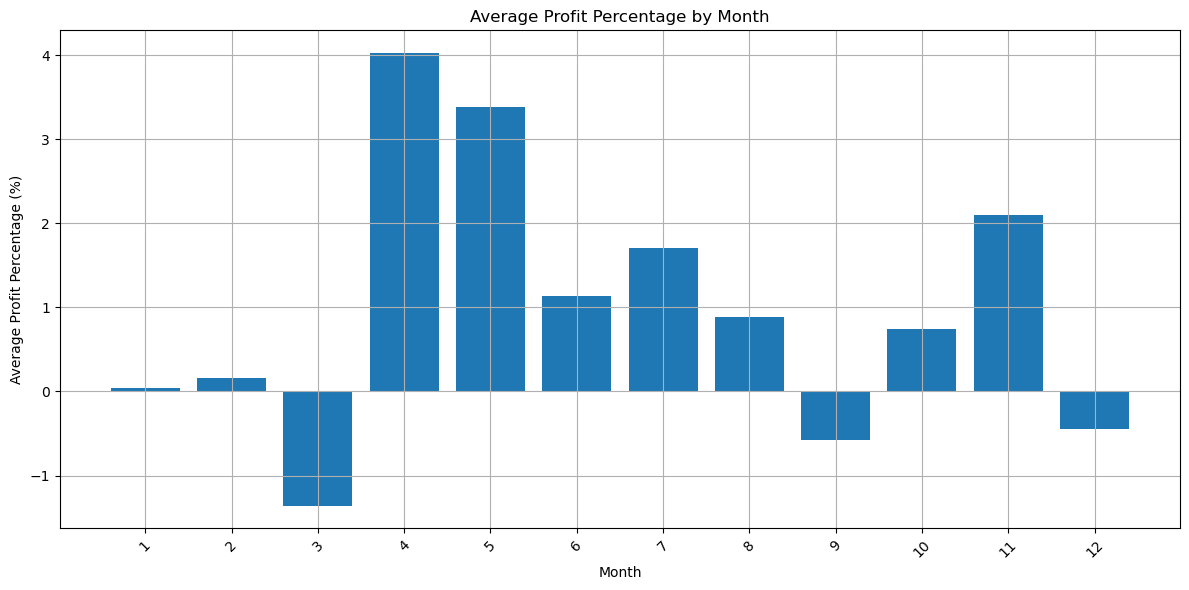

In [1127]:
# bar plot avg_profit_100_pct
plt.figure(figsize=(12, 6))
plt.bar(avg_profit_100_pct['Month'].astype(str), avg_profit_100_pct['Avg_Profit_pct_100']*100)
plt.title('Average Profit Percentage by Month')
plt.xlabel('Month')
plt.ylabel('Average Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1128]:
df_3_months = df_100.copy()

from datetime import datetime, timedelta

# Get the current date
today = datetime.now()

# Calculate the date 3 months ago
three_months_ago = today - timedelta(days=90)

# filter the dataframe for the last 3 months
df_3_months_filtered = df_3_months.loc[
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') >= three_months_ago) &
    (pd.to_datetime(df_3_months['Year'].astype(str) + '-' + df_3_months['Month'].astype(str) + '-01') <= today)
]

In [ ]:
# double check charts of last 3 months period..

In [1131]:
# from df_3_months_filtered calculate best and worst symbols
best_simbol_3_months = df_3_months_filtered.groupby('Simbolo')['Profitto_100'].sum().sort_values(ascending=False).round(2)

# Convert the result to a DataFrame
best_simbol_3_months = best_simbol_3_months.reset_index()

# Rename the columns
best_simbol_3_months.columns = ['Symbol', '3_Months_Gain']

# Display the result
best_simbol_3_months.sort_values(by='3_Months_Gain', ascending=False).head(10)
best_simbol_3_months

,Symbol,3_Months_Gain
0,US500,334.47
1,WMT,159.52
2,NVDA,65.72
3,GER40,8.07
4,USDJPY,-0.16
5,US100,-0.29
6,US30,-4.16
7,GBPJPY,-11.32
8,USDCAD,-214.22
9,BABA,-248.36


In [1132]:
# worst symbols
worst_simbol_3_months = best_simbol_3_months.sort_values(by='3_Months_Gain', ascending=True).head(10)

# rename columns
worst_simbol_3_months.columns = ['Symbol', '3_Months_Loss']

worst_simbol_3_months

,Symbol,3_Months_Loss
13,MSFT,-1764.66
12,USDCHF,-1414.22
11,EURUSD,-461.60
10,XAUUSD,-321.70
9,BABA,-248.36
8,USDCAD,-214.22
7,GBPJPY,-11.32
6,US30,-4.16
5,US100,-0.29
4,USDJPY,-0.16


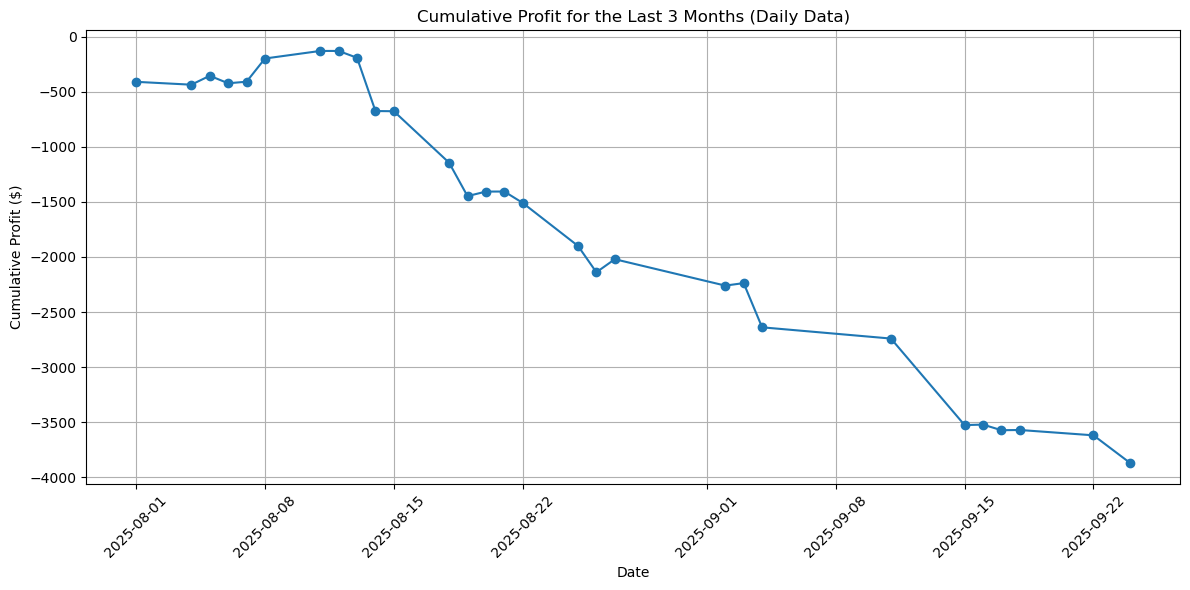

In [1133]:
# Raggruppa per Year, Month e Day e calcola la somma dei profitti
df_3_months_filtered_cumsum = df_3_months_filtered.groupby(['Year', 'Month', 'Day']).agg({'Profitto_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
df_3_months_filtered_cumsum = df_3_months_filtered_cumsum.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum['Date'] = pd.to_datetime(df_3_months_filtered_cumsum[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum['Date'], df_3_months_filtered_cumsum['Profitto_100'].cumsum(), marker='o')
plt.title('Cumulative Profit for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

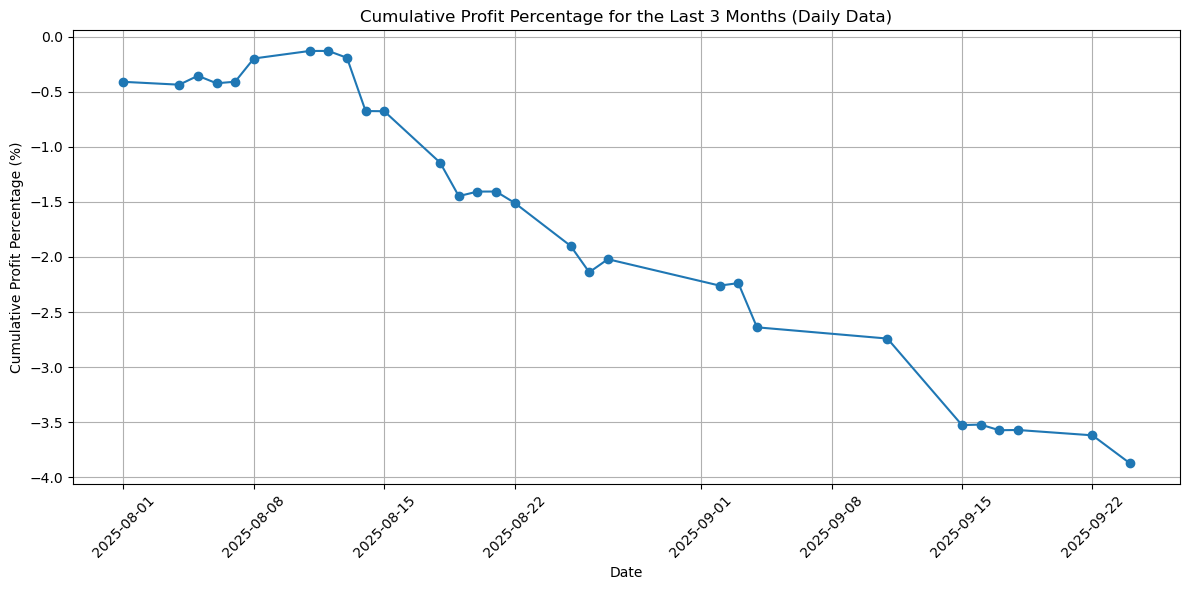

In [1134]:
# Raggruppa per Month, Year e Day e calcola la somma dei profitti percentuali
df_3_months_filtered_cumsum_pct = df_3_months_filtered.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (utile per il plot)
df_3_months_filtered_cumsum_pct = df_3_months_filtered_cumsum_pct.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
df_3_months_filtered_cumsum_pct['Date'] = pd.to_datetime(df_3_months_filtered_cumsum_pct[['Year', 'Month', 'Day']])

# Plot del grafico aggiornato
plt.figure(figsize=(12, 6))
plt.plot(df_3_months_filtered_cumsum_pct['Date'], df_3_months_filtered_cumsum_pct['Profit_pct_100'].cumsum(), marker='o')
plt.title('Cumulative Profit Percentage for the Last 3 Months (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1135]:
# win rate calculation for df_100

# Calculate the number of winning trades
winning_trades = df_100[df_100['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades
total_trades = df_100.shape[0]

# Calculate the win rate
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

# Display the win rate
print(f"Win Rate from April 2023: {win_rate:.2f}%")

Win Rate from April 2023: 51.10%


In [1136]:
# win rate calculation for df_3_months_filtered

# Calculate the number of winning trades for the last 3 months
winning_trades_3_months = df_3_months_filtered[df_3_months_filtered['Profitto_100'] > 0].shape[0]

# Calculate the total number of trades for the last 3 months
total_trades_3_months = df_3_months_filtered.shape[0]

# Calculate the win rate for the last 3 months
win_rate_3_months = (winning_trades_3_months / total_trades_3_months) * 100 if total_trades_3_months > 0 else 0

# Display the win rate for the last 3 months
print(f"Win Rate for the Last 3 Months: {win_rate_3_months:.2f}%")

Win Rate for the Last 3 Months: 45.30%


In [1137]:
# count total number of trades for the whole dataset
total_trades_all = df_100.shape[0]

# Display the total number of trades
print(f"Total Number of Trades: {total_trades_all}")

Total Number of Trades: 11817


In [1138]:
# Number of trades per day
trades_per_day = df_100.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Trades_Count')

# Display the first few rows of trades_per_day
trades_per_day.head(10)

,Year,Month,Day,Trades_Count
0,2023,4,17,9
1,2023,4,18,5
2,2023,4,19,5
3,2023,4,20,3
4,2023,4,21,5
5,2023,4,24,2
6,2023,4,26,4
7,2023,4,28,5
8,2023,5,1,5
9,2023,5,2,5


In [1139]:
# average number of trades per day
avg_trades_per_day = trades_per_day['Trades_Count'].mean()

# Display the average number of trades per day
print(f"Average Number of Trades per Day: {avg_trades_per_day:.2f}")

Average Number of Trades per Day: 19.70


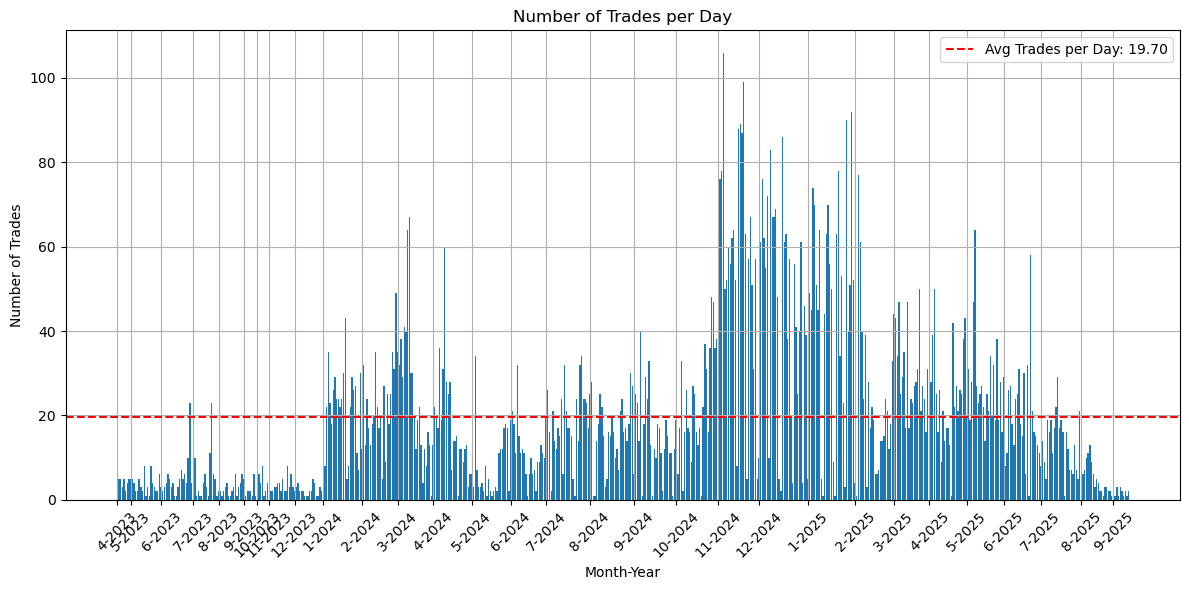

In [1140]:
# trades_per_day plot with bar chart, with avg_trades_per_day horizontal line
plt.figure(figsize=(12, 6))
plt.bar(trades_per_day.index, trades_per_day['Trades_Count'])

# Days grouped by Month and Year for x-axis labels
month_year = trades_per_day['Month'].astype(str) + '-' + trades_per_day['Year'].astype(str)
_, tick_positions = np.unique(month_year, return_index=True)
tick_labels = month_year.iloc[tick_positions].values

plt.axhline(y=avg_trades_per_day, color='r', linestyle='--', label=f'Avg Trades per Day: {avg_trades_per_day:.2f}')
plt.title('Number of Trades per Day')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trades')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [1141]:
# Create filtered data_tv_tv_tvframes for each symbol/asset
df_nq_100 = df_100[df_100['Simbolo'] == 'US100'].copy()
df_spx_100 = df_100[df_100['Simbolo'] == 'US500'].copy()
df_us30_100 = df_100[df_100['Simbolo'] == 'US30'].copy()
df_stocks_100 = df_100[df_100['Asset'] == 'Stocks'].copy()

# add dfs
df_crypto_100 = df_100[df_100['Asset'] == 'Crypto'].copy()
df_forex_100 = df_100[df_100['Asset'] == 'Forex'].copy()
df_commodities_100 = df_100[df_100['Asset'] == 'Commodities'].copy()

In [1144]:
# df_nq group by Year, Month and day columns
df_nq_grouped = df_nq_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_nq_grouped['Cumulative_Profit'] = np.log(1 + df_nq_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

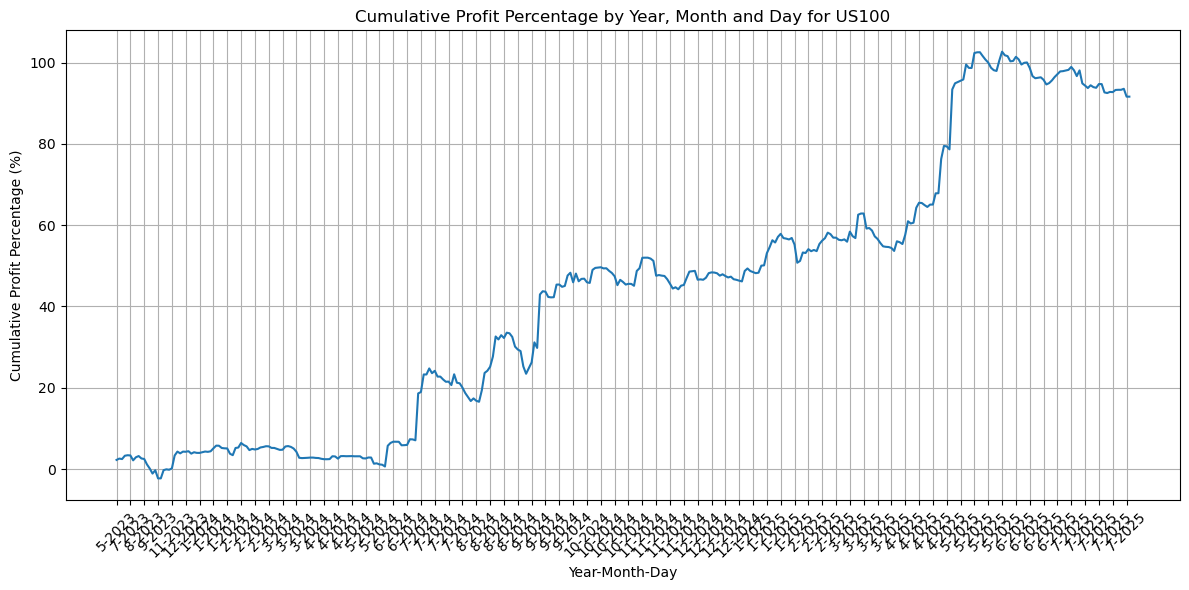

In [1145]:
# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped['Day'].astype(str) + '-' + df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str), df_nq_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit Percentage by Year, Month and Day for US100')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(
	ticks=range(0, len(df_nq_grouped), 5),
	labels=(df_nq_grouped['Month'].astype(str) + '-' + df_nq_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


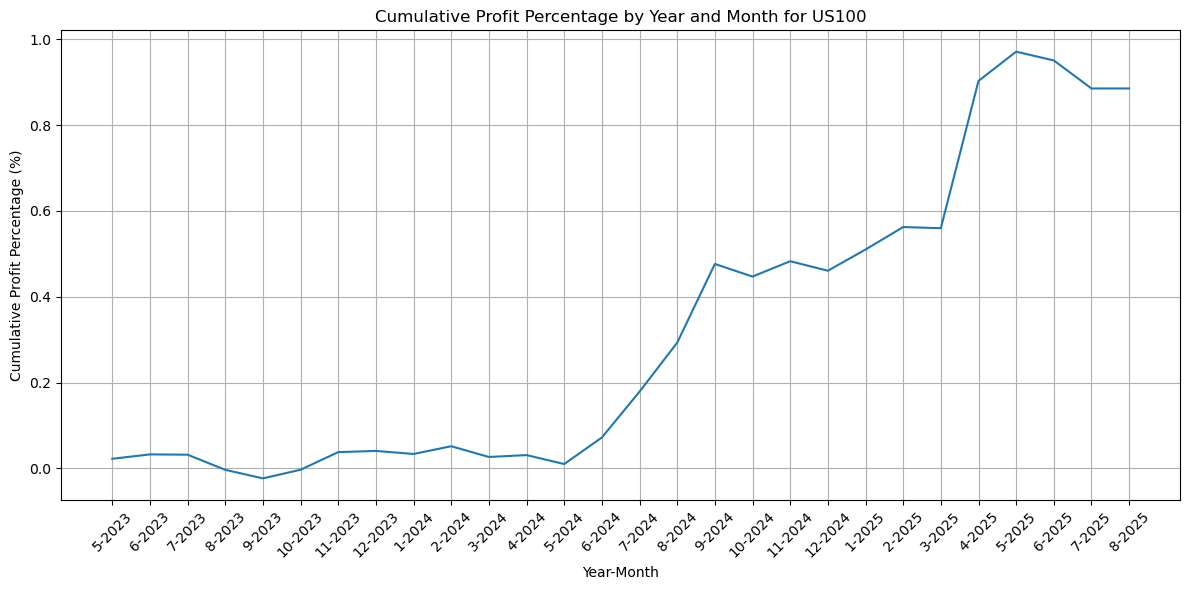

In [1146]:
# df_nq group by Year, Month
df_nq_grouped_month_year = df_nq_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_nq_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month using log returns
df_nq_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_nq_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_nq_grouped_month_year['Month'].astype(str) + '-' + df_nq_grouped_month_year['Year'].astype(str), df_nq_grouped_month_year['Cumulative_Profit'])
plt.title('Cumulative Profit Percentage by Year and Month for US100')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


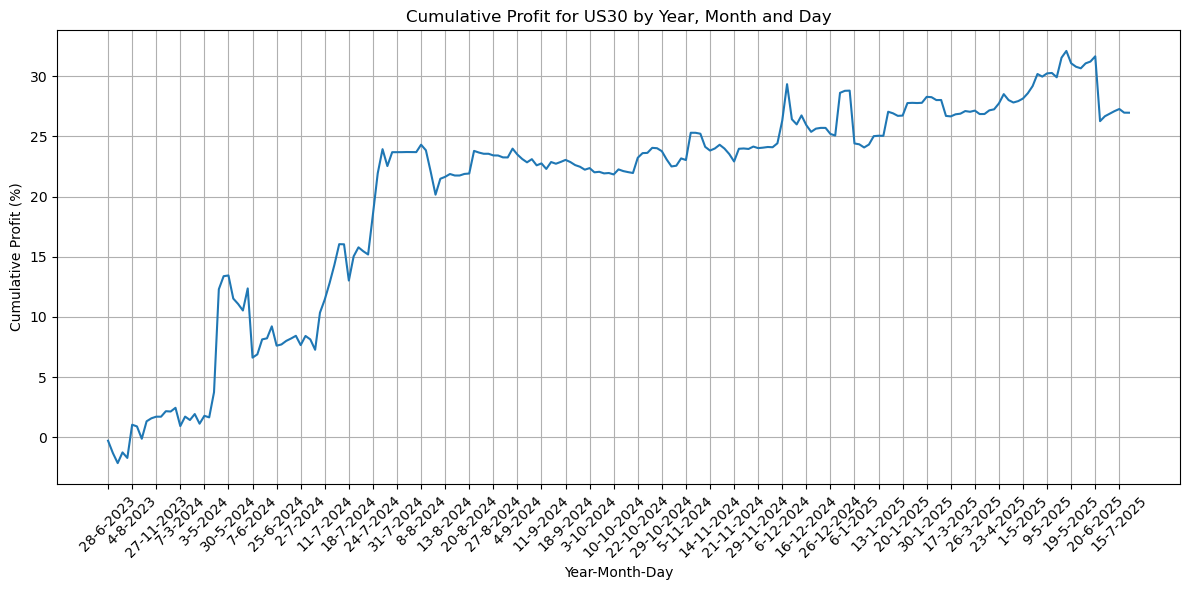

In [1147]:
# df_us30 group by Year, Month and day columns
df_us30_grouped = df_us30_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped['Cumulative_Profit'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str), df_us30_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(
	ticks=range(0, len(df_us30_grouped), 5),
	labels=(df_us30_grouped['Day'].astype(str) + '-' + df_us30_grouped['Month'].astype(str) + '-' + df_us30_grouped['Year'].astype(str))[::5],
	rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

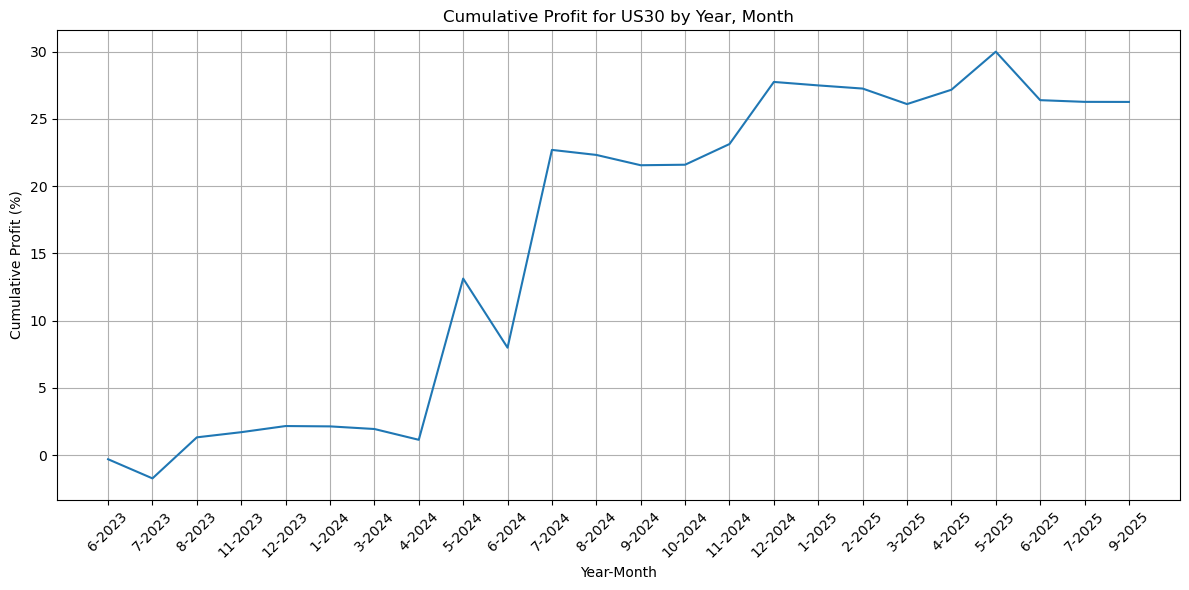

In [1148]:
# df_us30 group by Year, Month
df_us30_grouped_month_year = df_us30_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_us30_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_us30_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_us30_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_us30_grouped_month_year['Month'].astype(str) + '-' + df_us30_grouped_month_year['Year'].astype(str), df_us30_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US30 by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

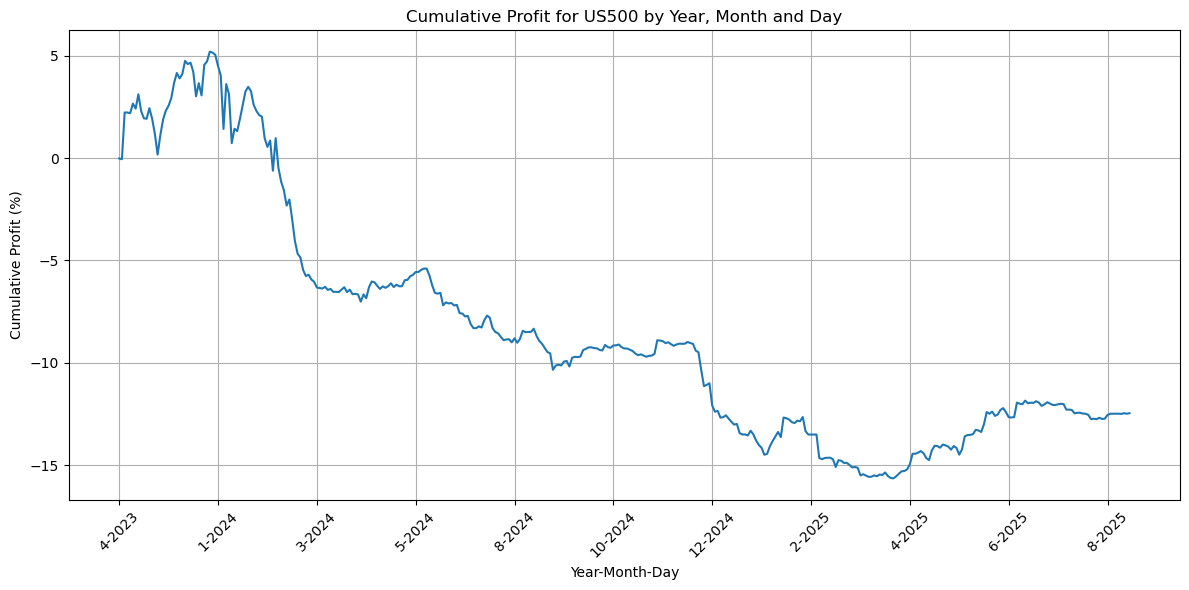

In [1149]:
# df_spx group by Year, Month and day columns
df_spx_grouped = df_spx_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped['Cumulative_Profit'] = np.log(1 + df_spx_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped['Day'].astype(str) + '-' + df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str), df_spx_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_spx_grouped), max(1, len(df_spx_grouped)//10)), 
           labels=(df_spx_grouped['Month'].astype(str) + '-' + df_spx_grouped['Year'].astype(str))[::max(1, len(df_spx_grouped)//10)],
           rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

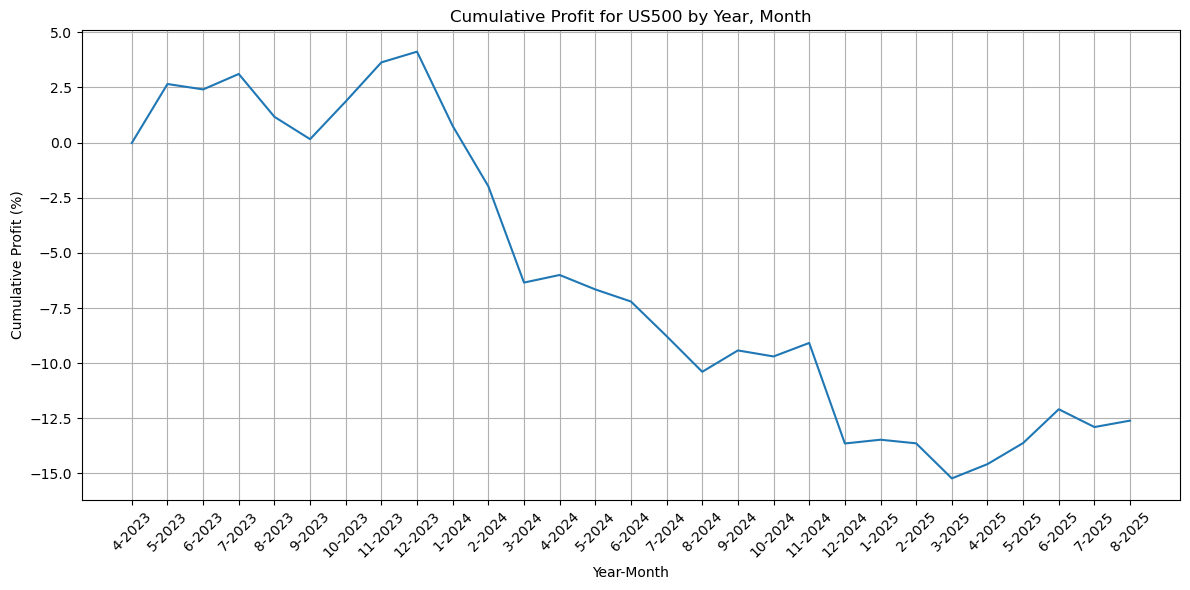

In [1150]:
# df_spx group by Year, Month
df_spx_grouped_month_year = df_spx_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_spx_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_spx_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_spx_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_spx_grouped_month_year['Month'].astype(str) + '-' + df_spx_grouped_month_year['Year'].astype(str), df_spx_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for US500 by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)           
plt.grid()
plt.tight_layout()
plt.show()

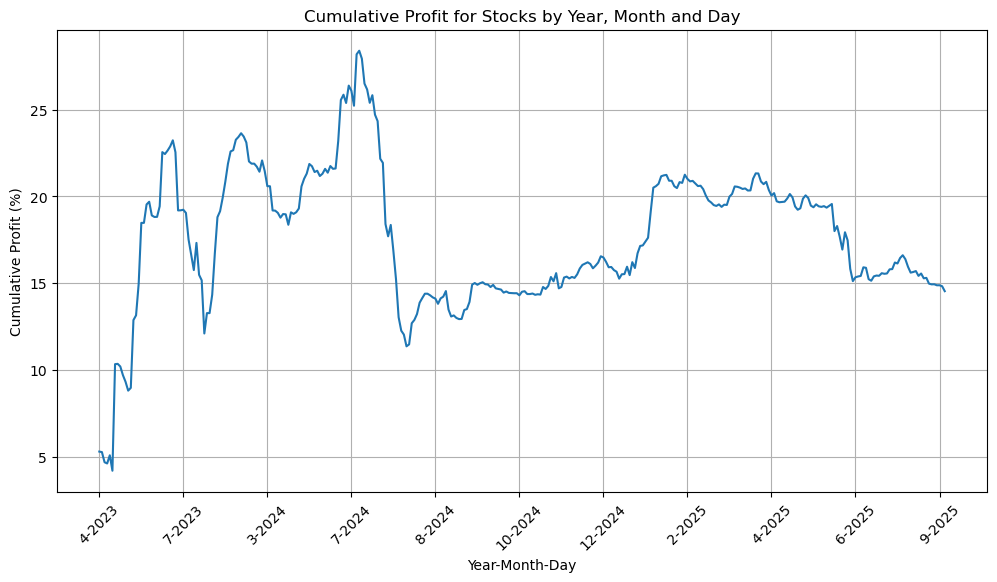

In [1151]:
# df_stocks_100 group by Year, Month and day columns
df_stocks_grouped = df_stocks_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped['Cumulative_Profit'] = np.log(1 + df_stocks_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str), df_stocks_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
# plt.xticks(rotation=45)
# plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
#            labels=(df_stocks_grouped['Day'].astype(str) + '-' + df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
#            rotation=45)
plt.xticks(ticks=range(0, len(df_stocks_grouped), max(1, len(df_stocks_grouped) // 10)), 
           labels=(df_stocks_grouped['Month'].astype(str) + '-' + df_stocks_grouped['Year'].astype(str))[::max(1, len(df_stocks_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.show()

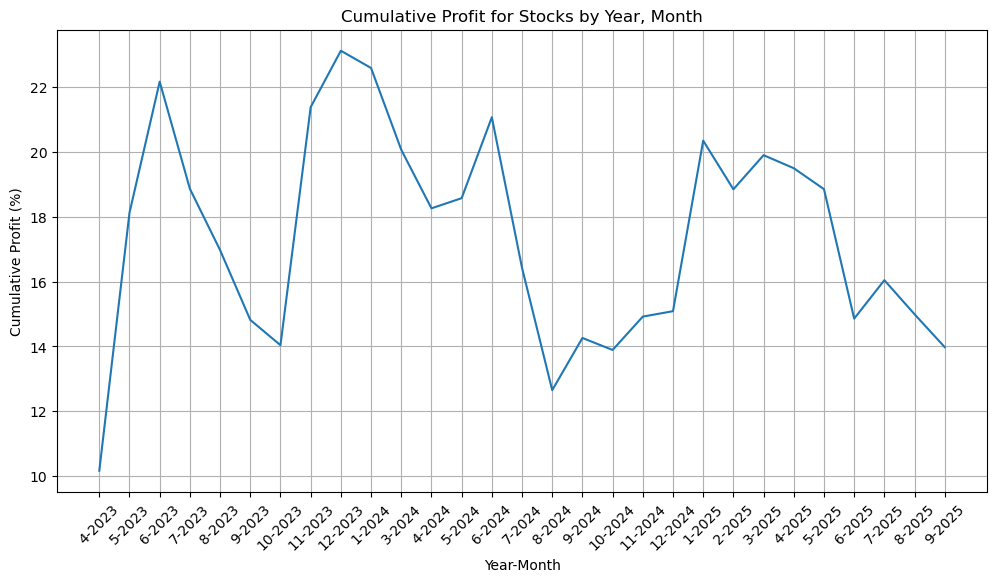

In [1152]:
# df_stocks_100 group by Year, Month
df_stocks_grouped_month_year = df_stocks_100.groupby(['Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_stocks_grouped_month_year.columns = ['Year', 'Month', 'Profit_pct_100']  

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_stocks_grouped_month_year['Cumulative_Profit'] = np.log(1 + df_stocks_grouped_month_year['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_stocks_grouped_month_year['Month'].astype(str) + '-' + df_stocks_grouped_month_year['Year'].astype(str), df_stocks_grouped_month_year['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Stocks by Year, Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

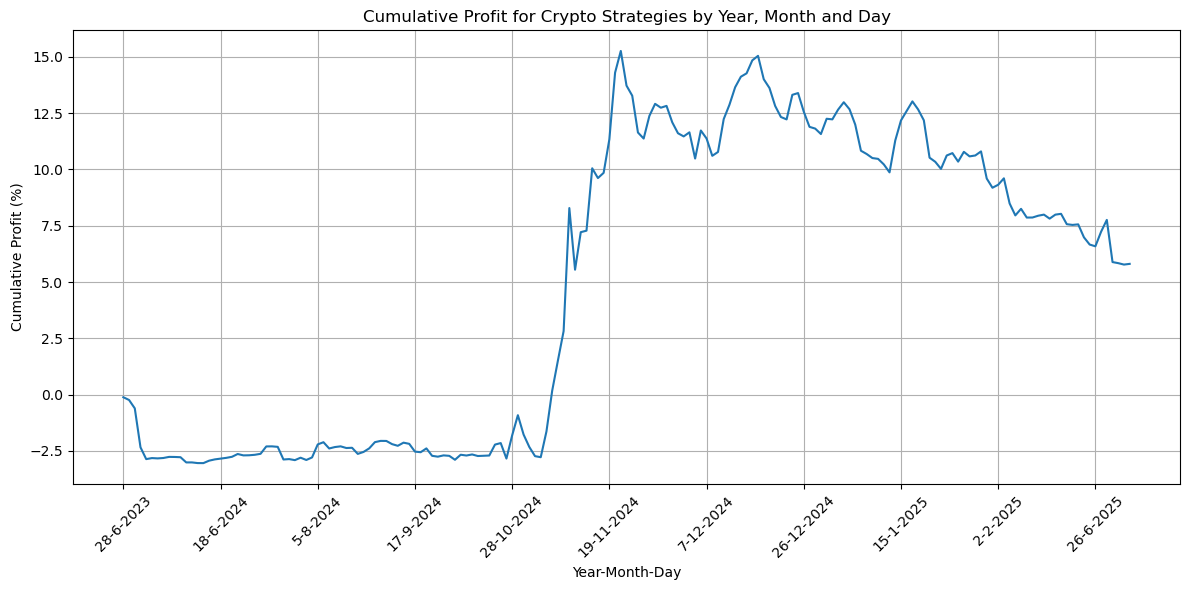

In [1153]:
# group df_crypto_100 by Year, Month and Day
df_crypto_grouped = df_crypto_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_crypto_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_crypto_grouped['Cumulative_Profit'] = np.log(1 + df_crypto_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_crypto_grouped['Day'].astype(str) + '-' + df_crypto_grouped['Month'].astype(str) + '-' + df_crypto_grouped['Year'].astype(str), df_crypto_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Crypto Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_crypto_grouped), max(1, len(df_crypto_grouped) // 10)), 
           labels=(df_crypto_grouped['Day'].astype(str) + '-' + df_crypto_grouped['Month'].astype(str) + '-' + df_crypto_grouped['Year'].astype(str))[::max(1, len(df_crypto_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1154]:
# Add here Performance of Crypto Strategies against BTC as benchmark

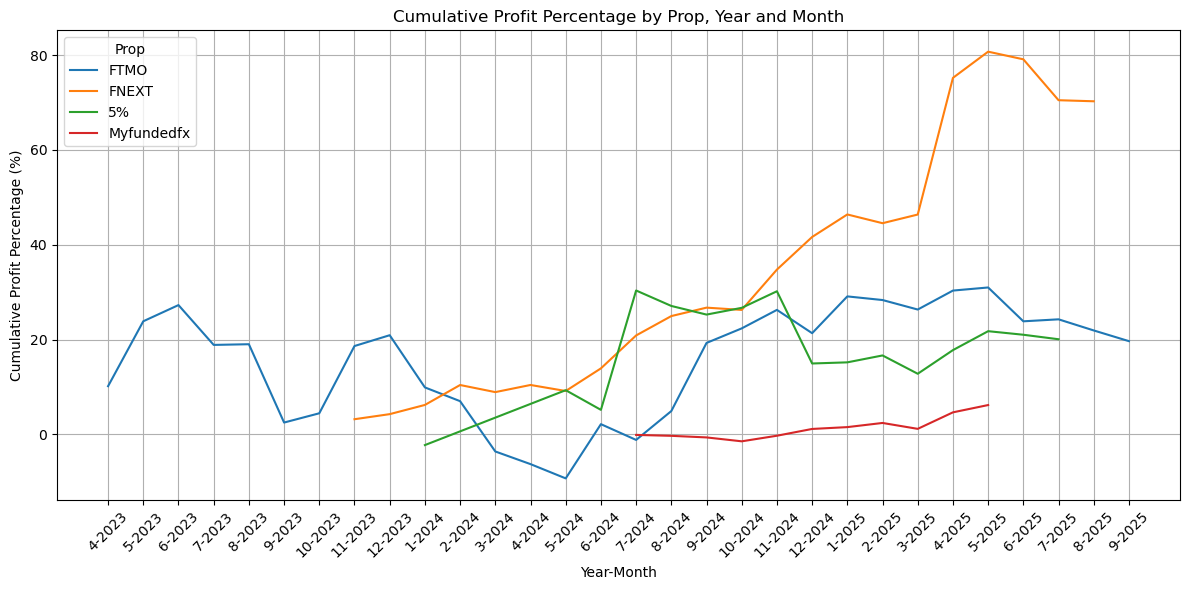

In [1155]:
# group by Prop and Month, then plot Cumulative Profit_pct_100
df_prop = df_100.groupby(['Prop', 'Year', 'Month']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_prop.columns = ['Prop', 'Year', 'Month', 'Profit_pct_100']

# sort by Year and Month to ensure chronological order
df_prop = df_prop.sort_values(['Year', 'Month'])

# calculate cumulative Profit_pct_100 by Prop, Year and Month using log returns
df_prop['Cumulative_Profit'] = df_prop.groupby('Prop').apply(
    lambda x: np.log(1 + x['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
).reset_index(level=0, drop=True)

# plot the data with a line chart
plt.figure(figsize=(12, 6))
for prop in df_prop['Prop'].unique():
    prop_data = df_prop[df_prop['Prop'] == prop]
    plt.plot(prop_data['Month'].astype(str) + '-' + prop_data['Year'].astype(str), prop_data['Cumulative_Profit']*100, label=prop)
plt.title('Cumulative Profit Percentage by Prop, Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Profit Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Prop')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Add here profit on founded accounts by prop

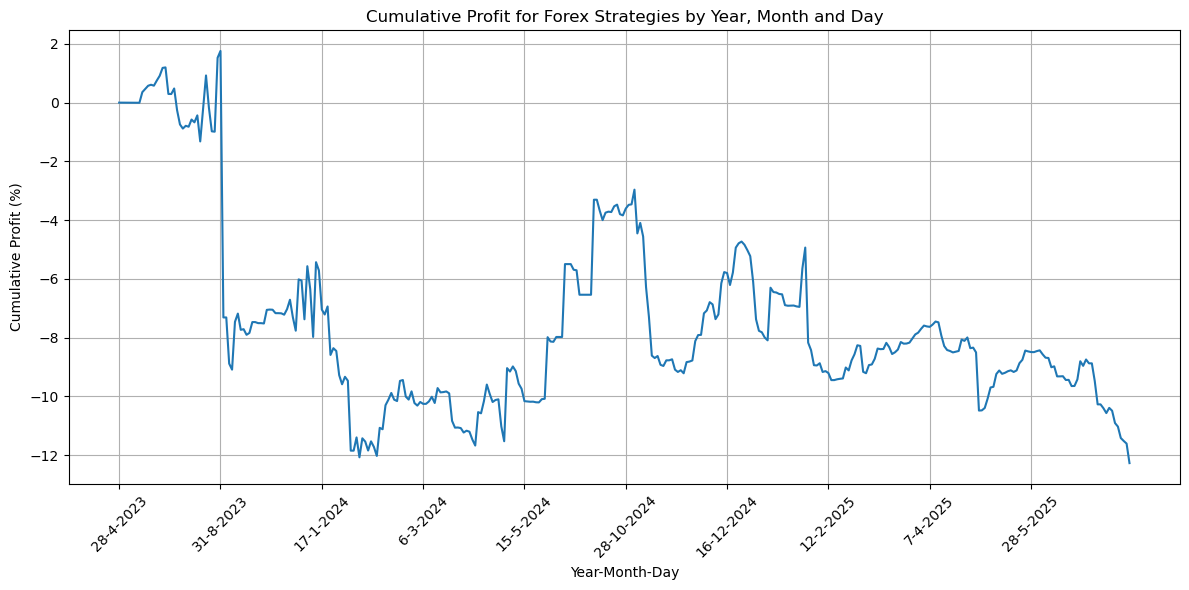

In [1157]:
# group df_forex_100 by Year, Month and Day
df_forex_grouped = df_forex_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_forex_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_forex_grouped['Cumulative_Profit'] = np.log(1 + df_forex_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_forex_grouped['Day'].astype(str) + '-' + df_forex_grouped['Month'].astype(str) + '-' + df_forex_grouped['Year'].astype(str), df_forex_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Forex Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_forex_grouped), max(1, len(df_forex_grouped) // 10)), 
           labels=(df_forex_grouped['Day'].astype(str) + '-' + df_forex_grouped['Month'].astype(str) + '-' + df_forex_grouped['Year'].astype(str))[::max(1, len(df_forex_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

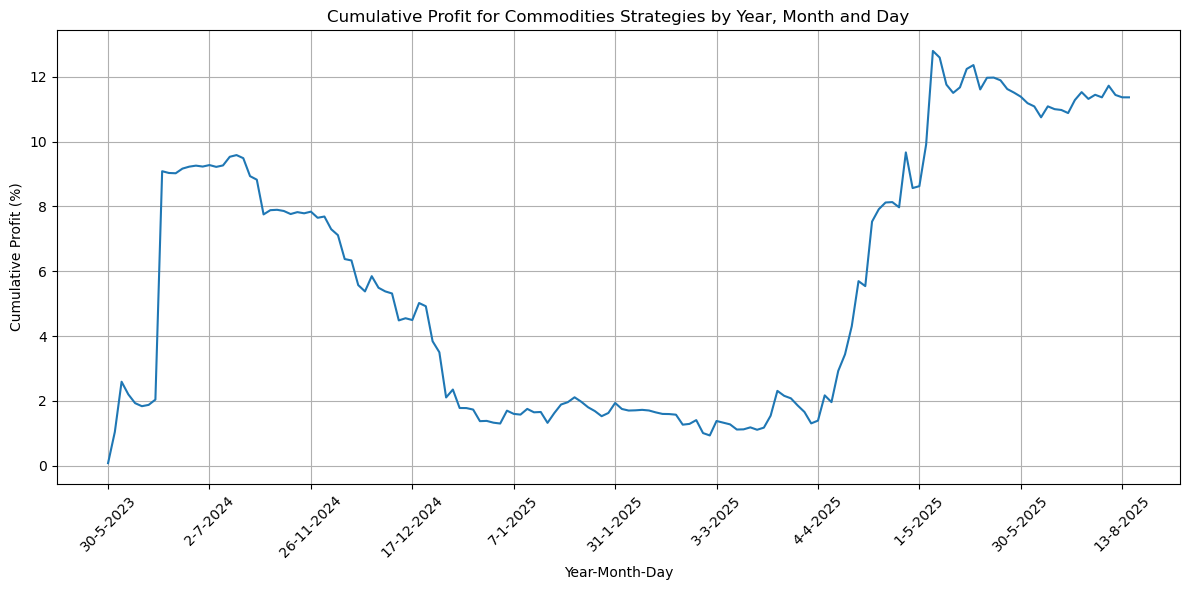

In [1158]:
# group df_commodities_100 by Year, Month and Day
df_commodities_grouped = df_commodities_100.groupby(['Year', 'Month', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# rename columns
df_commodities_grouped.columns = ['Year', 'Month', 'Day', 'Profit_pct_100']

# calculate cumulative Profit_pct_100 by year, month and day using log returns
df_commodities_grouped['Cumulative_Profit'] = np.log(1 + df_commodities_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# plot the data with a line chart
plt.figure(figsize=(12, 6))
plt.plot(df_commodities_grouped['Day'].astype(str) + '-' + df_commodities_grouped['Month'].astype(str) + '-' + df_commodities_grouped['Year'].astype(str), df_commodities_grouped['Cumulative_Profit']*100)
plt.title('Cumulative Profit for Commodities Strategies by Year, Month and Day')
plt.xlabel('Year-Month-Day')
plt.ylabel('Cumulative Profit (%)')
plt.xticks(ticks=range(0, len(df_commodities_grouped), max(1, len(df_commodities_grouped) // 10)), 
           labels=(df_commodities_grouped['Day'].astype(str) + '-' + df_commodities_grouped['Month'].astype(str) + '-' + df_commodities_grouped['Year'].astype(str))[::max(1, len(df_commodities_grouped) // 10)], 
           rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# change name of df_100_no_5ers..

In [1167]:
# Soluzione corretta per le colonne datetime
df_100_no_5ers = df_100.copy()

# Rimuovi dayfirst=True perché i dati sono già in formato ISO
df_100_no_5ers['Apri'] = pd.to_datetime(df_100_no_5ers['Apri'], errors='coerce')
df_100_no_5ers['Chiudi'] = pd.to_datetime(df_100_no_5ers['Chiudi'], errors='coerce')

# Crea i DataFrame per le strategie principali e ordina per 'Apri'
df_nq_sorted = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US100'].copy().sort_values(by='Apri')
df_us30_sorted = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US30'].copy().sort_values(by='Apri')
df_spx_sorted = df_100_no_5ers[df_100_no_5ers['Simbolo'] == 'US500'].copy().sort_values(by='Apri')
df_stocks_sorted = df_100_no_5ers[df_100_no_5ers['Asset'] == 'Stocks'].copy().sort_values(by='Apri')

In [1168]:
# Verifica i risultati
print("NaT in 'Apri' dopo correzione:", df_100_no_5ers['Apri'].isna().sum())
print("NaT in 'Chiudi' dopo correzione:", df_100_no_5ers['Chiudi'].isna().sum())

# Verifica che i ticket problematici siano ora convertiti correttamente
test_tickets = df_100_no_5ers[df_100_no_5ers['Ticket'].isin([262872616, 263264326, 263735393])]
print("\nValori dopo correzione:")
print(test_tickets[['Ticket', 'Apri', 'Chiudi']])

NaT in 'Apri' dopo correzione: 0
NaT in 'Chiudi' dopo correzione: 2

Valori dopo correzione:
Empty DataFrame
Columns: [Ticket, Apri, Chiudi]
Index: []


In [1169]:
# create df_NaT from df_100_no_5ers where Apri or Chiudi is NaT
df_NaT = df_100_no_5ers[df_100_no_5ers['Apri'].isna() | df_100_no_5ers['Chiudi'].isna()].copy()
# df_NaT

In [ ]:
# Check NaT in the sorted dataframes
print("Controllo finale:")
print(f"df_nq_sorted - NaT in Apri: {df_nq_sorted['Apri'].isna().sum()}")
print(f"df_us30_sorted - NaT in Apri: {df_us30_sorted['Apri'].isna().sum()}")
print(f"df_spx_sorted - NaT in Apri: {df_spx_sorted['Apri'].isna().sum()}")
print(f"df_stocks_sorted - NaT in Apri: {df_stocks_sorted['Apri'].isna().sum()}")

Controllo finale:
df_nq_sorted - NaT in Apri: 0
df_us30_sorted - NaT in Apri: 0
df_spx_sorted - NaT in Apri: 0
df_stocks_sorted - NaT in Apri: 0


In [1186]:
# # calculate cumulative return for df_nq, df_us30, df_spx and df_stocks 
df_nq_sorted['Cumulative_Return'] = np.log(1 + df_nq_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_us30_sorted['Cumulative_Return'] = np.log(1 + df_us30_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_spx_sorted['Cumulative_Return'] = np.log(1 + df_spx_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1
df_stocks_sorted['Cumulative_Return'] = np.log(1 + df_stocks_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

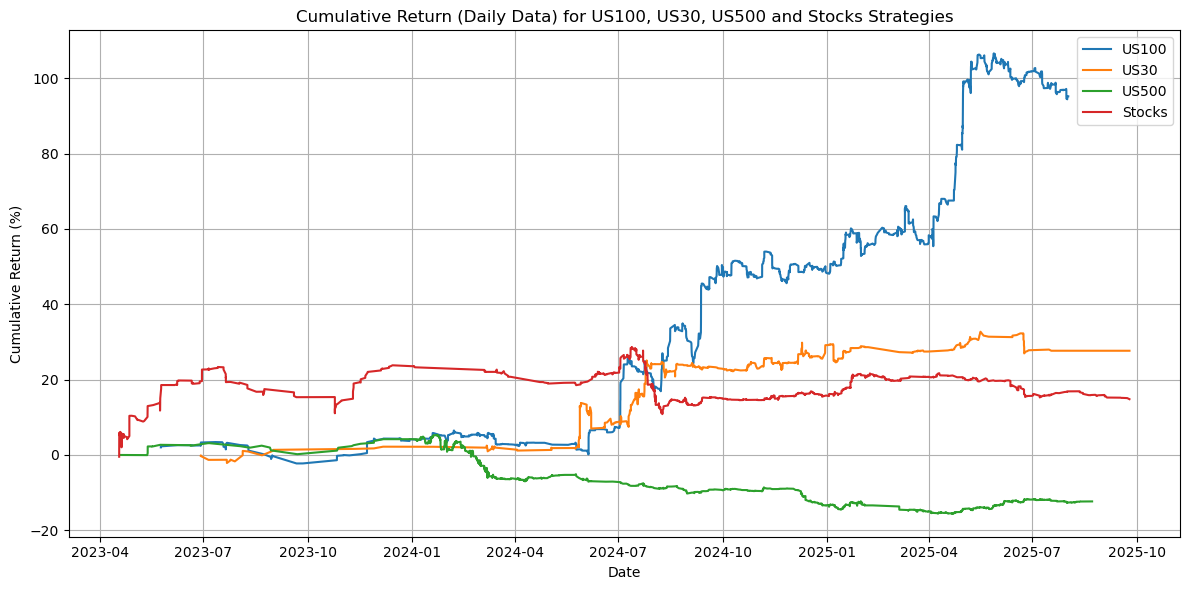

In [ ]:
# DOUBLE CHECK THIS PART

# plot cumulative return for df_nq, df_us30, df_spx and df_stocks
plt.figure(figsize=(12, 6))
plt.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='US100')
plt.plot(df_us30_sorted['Apri'], df_us30_sorted['Cumulative_Return']*100, label='US30') 
plt.plot(df_spx_sorted['Apri'], df_spx_sorted['Cumulative_Return']*100, label='US500')
plt.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Stocks')
plt.title('Cumulative Return (Daily Data) for US100, US30, US500 and Stocks Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Analysis from OBB library

In [1192]:
# # As a target benchmark, we will use SPY, QQQ, and DIA

# # download data for SPY, QQQ, and DIA from yFinance
# from openbb import obb

# symbols = ['SPY', 'QQQ', 'DIA']
# start_date = '2023-04-01'

# dataframes = []

# for symbol in symbols:
#     try:
#         data = obb.equity.price.historical(
#             symbol=symbol,
#             start_date=start_date,
#             provider="yfinance"
#         ).to_df()
#         data['Symbol'] = symbol
#         dataframes.append(data)
#     except Exception as e:
#         print(f"Failed to fetch data for {symbol}: {str(e)}")

# combined_data = pd.concat(dataframes)
# combined_data = combined_data.reset_index()

# # combined_data.head()

# combined_data_spy = df_sp500.copy()
# combined_data_dia = df_dia.copy()
# combined_data_qqq = df_qqq.copy()

# combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()
# combined_data_dia['daily_return'] = combined_data_dia['Close'].pct_change()
# combined_data_qqq['daily_return'] = combined_data_qqq['Close'].pct_change()

# # calculate the cumulative returns using log returns
# combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_dia['cumulative_return'] = np.log(1 + combined_data_dia['daily_return']).cumsum().apply(np.exp) - 1
# combined_data_qqq['cumulative_return'] = np.log(1 + combined_data_qqq['daily_return']).cumsum().apply(np.exp) - 1

## Analysis from tv library, for SPY Only

In [1193]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

# Connessione (se non metti user/password, usa versione guest con limiti)
tv = TvDatafeed()

# Lista ticker (usiamo il formato TradingView corretto!)
stock_exchanges = {
    'SPY': 'AMEX'   # su TradingView SPY è quotato come AMEX:SPY
}
# start is min of df_100_no_5ers.Apri
start_date = df_100_no_5ers.Apri.min()
today = datetime.now()
# days_difference = (today - start_date).days
n_bars = (today - start_date).days
# n_bars = min(days_difference + 100, 5000)  # max 5000

# Funzione con retry
def download_with_retry(symbol, exchange, retries=3, delay=2):
    for attempt in range(retries):
        try:
            print(f"📥 Downloading {symbol} ({exchange}) attempt {attempt+1}")
            data_tv = tv.get_hist(
                symbol=symbol,
                exchange=exchange,
                interval=Interval.in_daily,
                n_bars=n_bars
            )
            if data_tv is not None and not data_tv.empty:
                print(f"✅ {symbol}: {len(data_tv)} rows downloaded")
                return data_tv
        except Exception as e:
            print(f"❌ Error {symbol}: {e}")
        if attempt < retries - 1:
            time.sleep(delay)
    print(f"❌ Failed {symbol} after {retries} attempts")
    return None

# Download dati
data_dict = {}
failed = []
for stock, exchange in stock_exchanges.items():
    data_tv = download_with_retry(stock, exchange)
    if data_tv is not None:
        data_dict[stock] = data_tv['close']
    else:
        failed.append(stock)

# Combina
if data_dict:
    df_tv = pd.DataFrame(data_dict)
    df_tv.index = pd.to_datetime(df_tv.index)  # assicura datetime index
    print(f"📊 Shape: {df_tv.shape}")
    print(f"📅 Range: {df_tv.index.min()} → {df_tv.index.max()}")
    # print(df_tv.head())
else:
    print("❌ Nessun dato scaricato")

df_sp500 = df_tv.copy()

# rename column to Close
df_sp500.rename(columns={'SPY': 'Close'}, inplace=True)

📥 Downloading SPY (AMEX) attempt 1
✅ SPY: 899 rows downloaded
📊 Shape: (899, 1)
📅 Range: 2022-03-04 17:30:00 → 2025-10-02 16:30:00


## Analysis from csv file, for SPY Only

In [1194]:
# # Get CSV path from environment variables
# path_df_sp500 = os.getenv('path_df_sp500')

# # Use the path from environment
# url = path_df_sp500

# # # read csv file from url   
# # df_sp500 = pd.read_csv(url, sep=',', index_col=0, parse_dates=True)

# # Use this if df_sp500 has been downloaded and saved as a CSV file from yf
# # read csv file from url   
# df_sp500 = pd.read_csv(url, sep=';', index_col=0, parse_dates=True)

# # Assicurati che l'indice sia datetime
# df_sp500.index = pd.to_datetime(df_sp500.index)
# df_sp500.tail()

## Analysis from csv file, for SPY Only (yf format)

In [1195]:
# # to complete..................

# # Get CSV path from environment variables
# path_df_sp500 = os.getenv('path_df_sp500')

# # Load the CSV with semicolon separator and MultiIndex columns
# df_sp500 = pd.read_csv(path_df_sp500, sep=';', header=[0,1], index_col=0)

# # Drop any rows that are completely NaN (e.g. 'Date' row)
# df_sp500 = df_sp500.dropna(how='all')

# # Drop the "Ticker" row if it exists
# if 'Ticker' in df_sp500.index:
#     df_sp500 = df_sp500.drop('Ticker')

# # # Debug: check column structure
# # print("Columns:", df_sp500.columns.tolist())
# # print("Column levels:", df_sp500.columns.nlevels)

# # Convert index to datetime
# df_sp500.index = pd.to_datetime(df_sp500.index)

# # Convert all values to float
# df_sp500 = df_sp500.astype(float)

# # Find and keep only the "Close" column (search for Close in any level)
# close_cols = [col for col in df_sp500.columns if 'Close' in str(col)]
# # print("Close columns found:", close_cols)

# if close_cols:
#     df_sp500 = df_sp500[close_cols[0]]  # Take the first Close column found
# else:
#     # Fallback: take the first column if no Close found
#     df_sp500 = df_sp500.iloc[:, 0]

# # Show the result
# df_sp500.head()

In [1197]:
df_100_no_5ers.shape

(11817, 26)

In [1198]:
# Assicurati che Apri e Chiudi siano datetime
apri_min = pd.to_datetime(df_100_no_5ers['Apri']).min()
chiudi_max = pd.to_datetime(df_100_no_5ers['Chiudi']).max()

# keep only DatetimeIndex higher than df_100_no_5ers['Apri'].min() and lower than end_date = df_100_no_5ers['Chiudi'].max()
df_sp500 = df_sp500.loc[
    (df_sp500.index >= apri_min) &
    (df_sp500.index <= chiudi_max)
]

#df_sp500.head()

combined_data_spy = df_sp500.copy()

combined_data_spy['daily_return'] = combined_data_spy['Close'].pct_change()

# drop na
combined_data_spy = combined_data_spy.dropna(subset=['daily_return'])

# calculate the cumulative returns using log returns
combined_data_spy['cumulative_return'] = np.log(1 + combined_data_spy['daily_return']).cumsum().apply(np.exp) - 1

combined_data_spy.tail()


,Close,daily_return,cumulative_return
datetime,,,
2025-09-19 16:30:00,663.70,0.002174,0.602327
2025-09-22 16:30:00,666.84,0.004731,0.609908
2025-09-23 16:30:00,663.21,-0.005444,0.601144
2025-09-24 16:30:00,661.10,-0.003181,0.596050
2025-09-25 16:30:00,658.05,-0.004614,0.588687


In [1199]:
chiudi_max

Timestamp('2025-09-25 17:40:06')

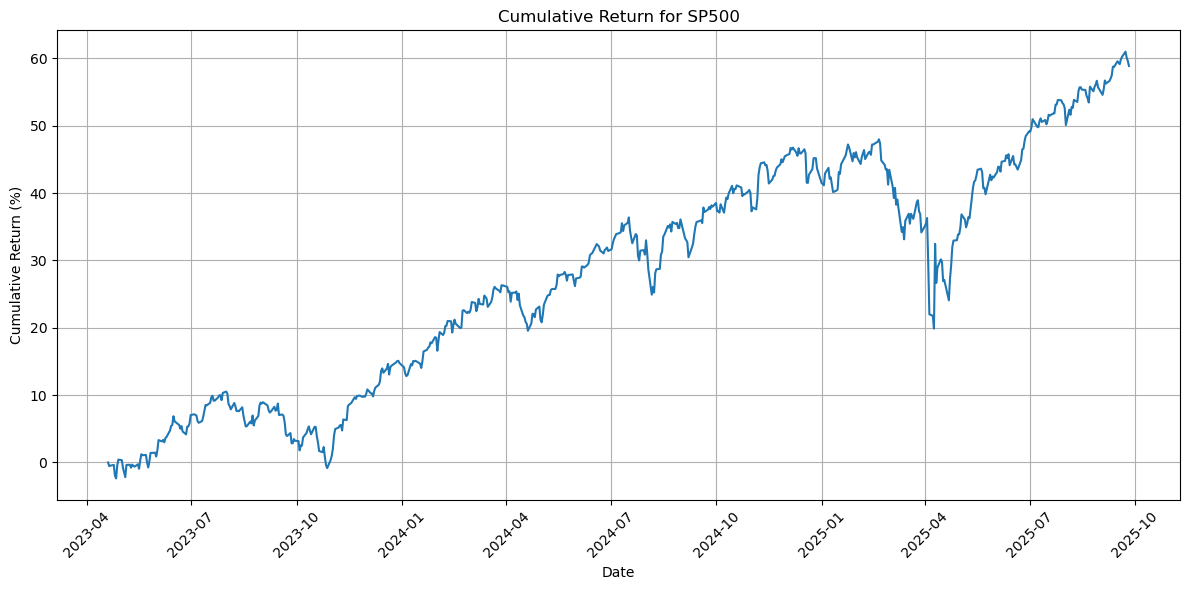

In [1200]:
# plot combined_data_spy cumulative_return column
plt.figure(figsize=(12, 6))
plt.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SP500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return for SP500')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

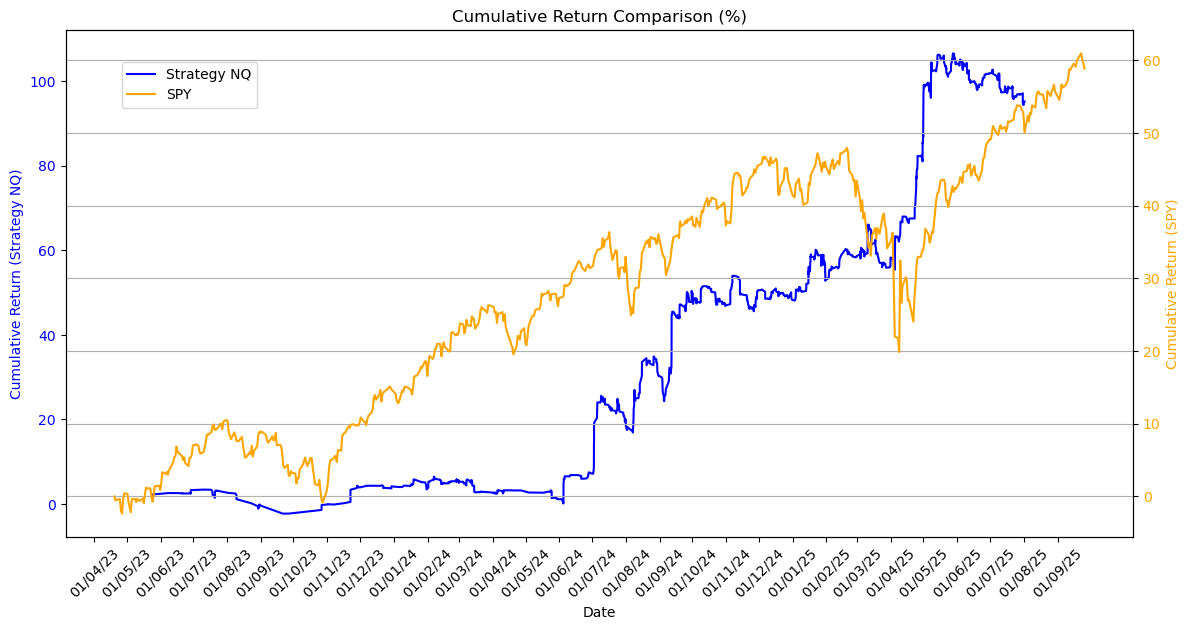

In [1201]:
# Use two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset on the primary y-axis
ax1.plot(df_nq_sorted['Apri'], df_nq_sorted['Cumulative_Return']*100, label='Strategy NQ', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy NQ)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# # Migliora la leggibilità delle etichette dell'asse x
# # Imposta i tick dell'asse x ogni 30 giorni (o altro intervallo ragionevole)
# df_us30_grouped['Date'] = pd.to_datetime(df_us30_grouped[['Year', 'Month', 'Day']])
# dates = df_us30_grouped['Date']

# tick_freq = 30  # mostra una data ogni 30 giorni
# if len(dates) > 0:
#     tick_positions = range(0, len(dates), tick_freq)
#     tick_labels = dates.iloc[list(tick_positions)].dt.strftime('%Y-%m-%d')
#     ax1.set_xticks(dates.iloc[list(tick_positions)])
#     ax1.set_xticklabels(tick_labels, rotation=45)

# Tick dell'asse x: una data per ogni mese di SPY
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

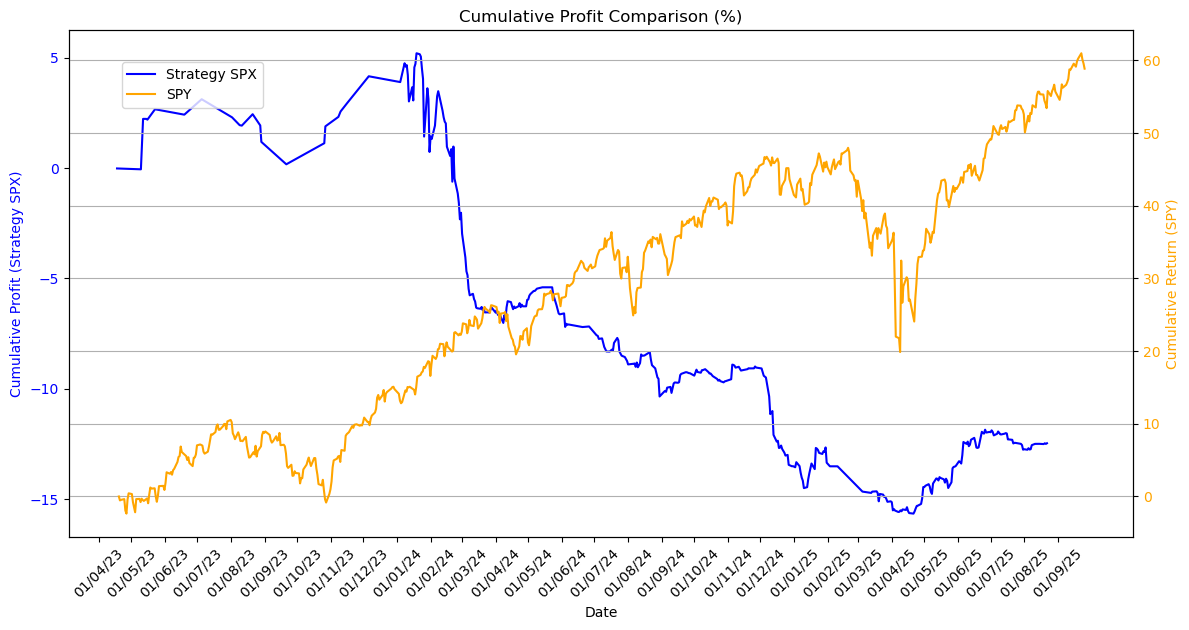

In [1203]:
# plot df_spx_grouped e combined_data_spy usando due assi y diversi, con asse x datetime coerente
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea una colonna datetime per df_spx_grouped
df_spx_grouped['Date'] = pd.to_datetime(df_spx_grouped[['Year', 'Month', 'Day']])

# Plot strategia SPX sull'asse primario
ax1.plot(df_spx_grouped['Date'], df_spx_grouped['Cumulative_Profit']*100, label='Strategy SPX', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Profit (Strategy SPX)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot SPY sull'asse secondario
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Profit Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Tick dell'asse x: una data per ogni mese di SPY
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [1204]:
df_us30_grouped

,Year,Month,Day,Profit_pct_100,Cumulative_Profit
0,2023,6,28,-0.295855,-0.002959
1,2023,7,5,-1.024710,-0.013175
2,2023,7,21,-0.848050,-0.021544
3,2023,7,24,0.909930,-0.012641
4,2023,7,28,-0.465240,-0.017234
...,...,...,...,...,...
208,2025,6,26,0.165320,0.268807
209,2025,6,27,0.171070,0.270978
210,2025,7,15,0.138750,0.272741
211,2025,7,17,-0.238550,0.269705


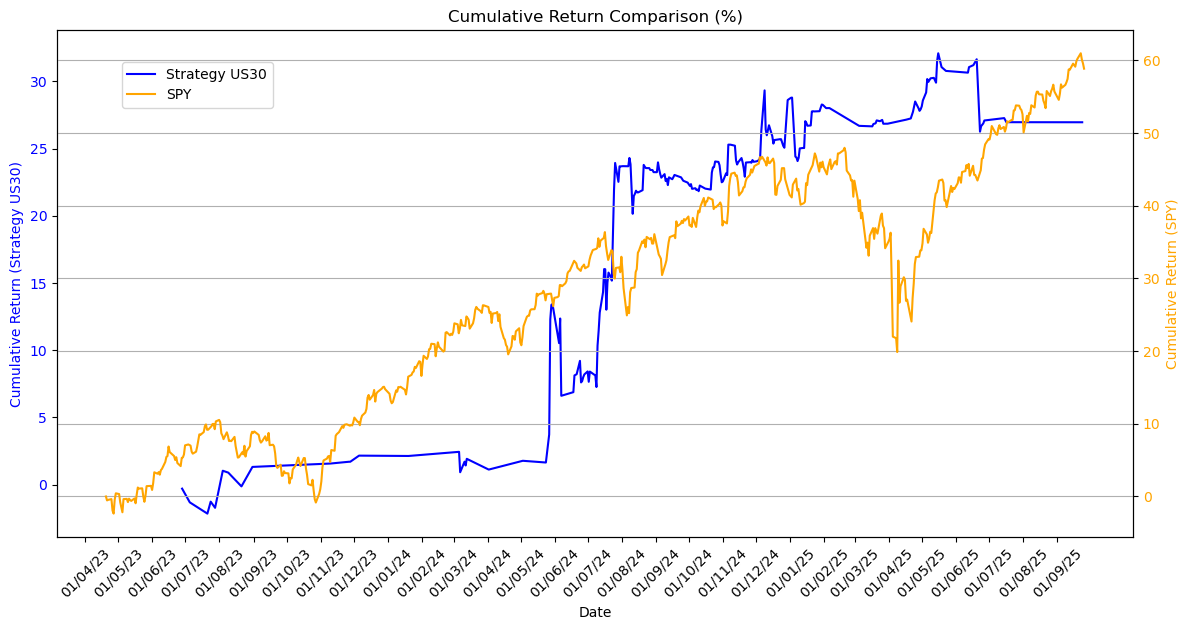

In [1206]:
# Calcolo dei log return cumulativi per df_us30_grouped
df_us30_grouped['Date'] = pd.to_datetime(df_us30_grouped[['Year', 'Month', 'Day']])
df_us30_grouped['Cumulative_Return'] = np.log(1 + df_us30_grouped['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

# Plot dei dati su due assi y diversi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primo dataset sull'asse y primario (x = datetime)
ax1.plot(
    df_us30_grouped['Date'],
    df_us30_grouped['Cumulative_Return']*100,
    label='Strategy US30',
    color='blue'
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategy US30)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondo dataset sull'asse y secondario
combined_data_spy.index = pd.to_datetime(combined_data_spy.index)
ax2 = ax1.twinx()
ax2.plot(
    combined_data_spy.index,
    combined_data_spy['cumulative_return']*100,
    label='SPY',
    color='orange'
)
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

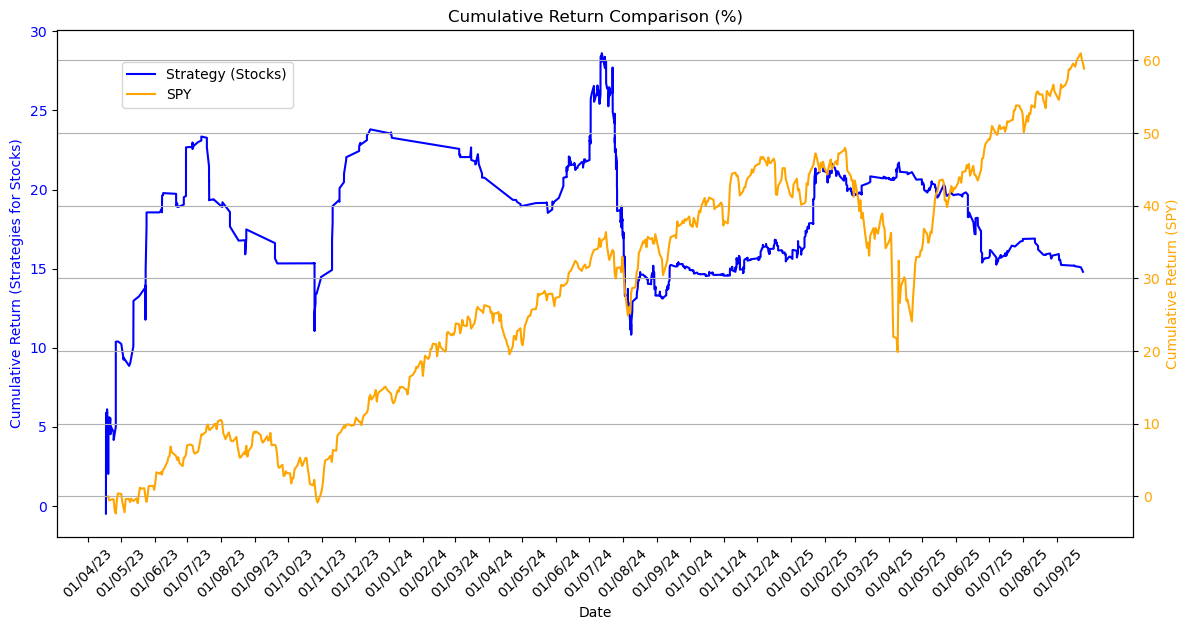

In [1207]:
# plot cumulative return for df_stocks_sorted and combined_data_spy using due assi y diversi
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Strategy (Stocks) sull'asse primario
ax1.plot(df_stocks_sorted['Apri'], df_stocks_sorted['Cumulative_Return']*100, label='Strategy (Stocks)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (Strategies for Stocks)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crea un asse secondario per SPY
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titolo e legenda
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [1208]:
# create df copy
df_total_strategies = df_100_no_5ers.copy()

# sort df_total_strategies by Apri
df_total_strategies_sorted = df_total_strategies.sort_values(by='Apri')

# calculate cumulative return for df_total_strategies_sorted using log returns
df_total_strategies_sorted['Cumulative_Return'] = np.log(1 + df_total_strategies_sorted['Profit_pct_100'] / 100).cumsum().apply(np.exp) - 1

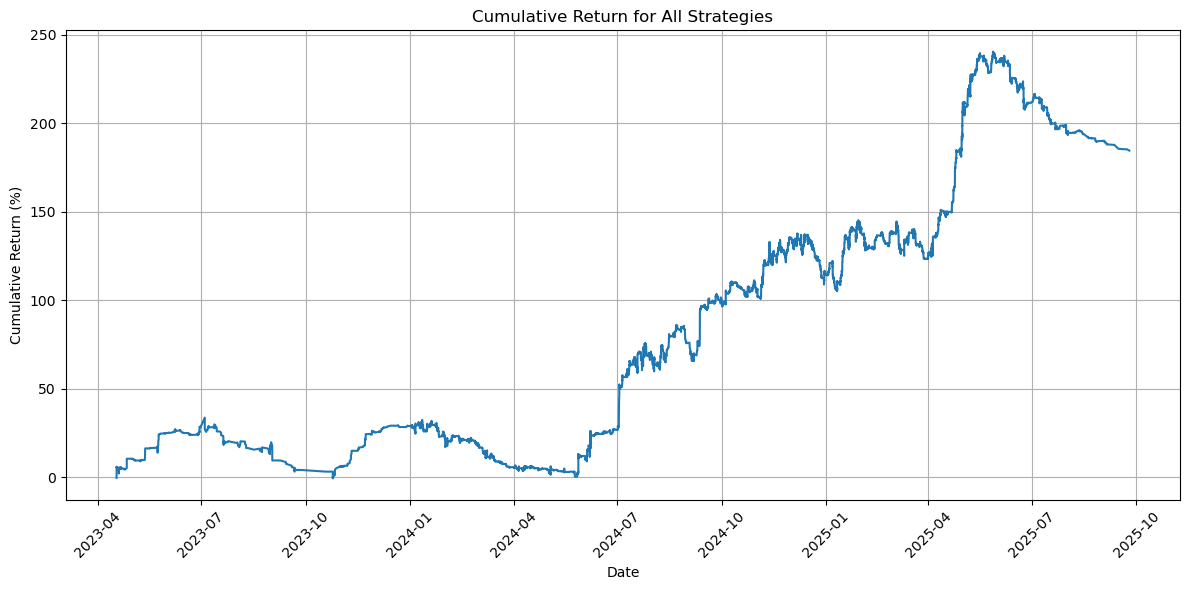

In [1209]:
# plot df_total_strategies_sorted
plt.figure(figsize=(12, 6))
plt.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100)
plt.title('Cumulative Return for All Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

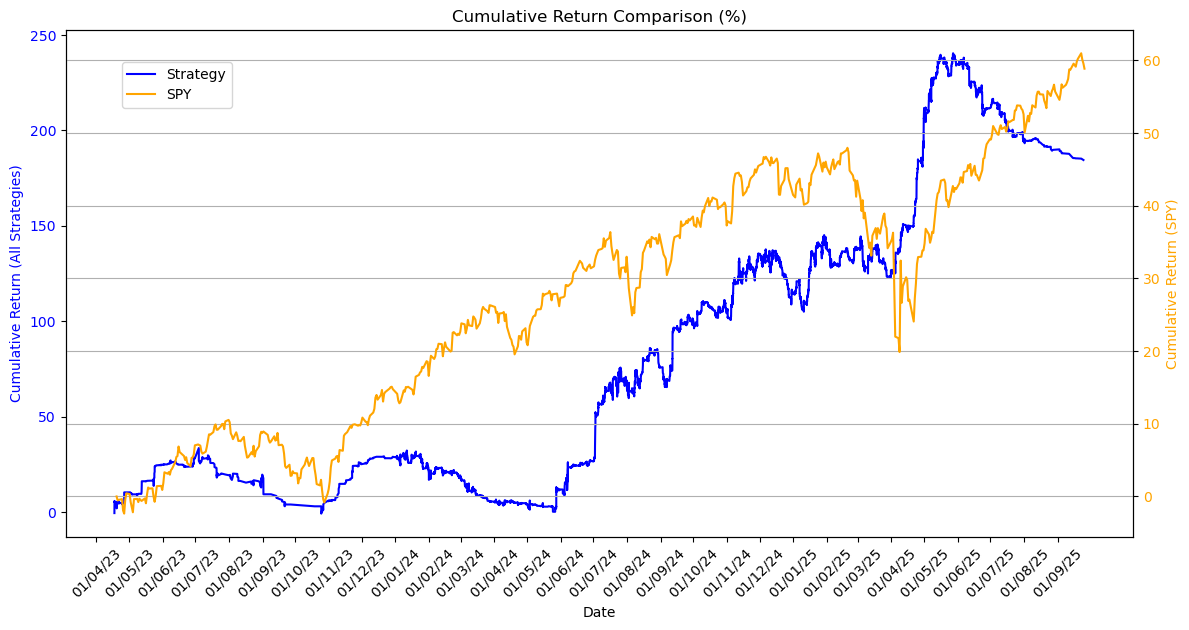

In [1210]:
# plot df_total_strategies_sorted and combined_data_spy using two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot the first dataset on the primary y-axis
ax1.plot(df_total_strategies_sorted['Apri'], df_total_strategies_sorted['Cumulative_Return']*100, label='Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return (All Strategies)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(combined_data_spy.index, combined_data_spy['cumulative_return']*100, label='SPY', color='orange')
ax2.set_ylabel('Cumulative Return (SPY)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Cumulative Return Comparison (%)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()

# Migliora la leggibilità delle etichette dell'asse x: una data per ogni mese, prendendo i mesi da combined_data_spy
spy_month_starts = combined_data_spy.index.to_period('M').drop_duplicates().to_timestamp()
tick_labels = spy_month_starts.strftime('%d/%m/%y')
ax1.set_xticks(spy_month_starts)
ax1.set_xticklabels(tick_labels, rotation=45)

plt.show()

In [1211]:
# df_total_strategies.info()

# drop na
combined_data_spy = combined_data_spy.dropna()

combined_data_spy.head()

,Close,daily_return,cumulative_return
datetime,,,
2023-04-19 16:30:00,414.14,-0.000169,-0.000169
2023-04-20 16:30:00,411.88,-0.005457,-0.005625
2023-04-21 16:30:00,412.20,0.000777,-0.004853
2023-04-24 16:30:00,412.63,0.001043,-0.003814
2023-04-25 16:30:00,406.08,-0.015874,-0.019628


In [1215]:
# Calculate the maximum drawdown of spy
daily_returns_spy = combined_data_spy['Close'].pct_change()

cumulative_returns_spy = (1 + daily_returns_spy).cumprod() # here in internet they add -1

cumulative_max_spy = cumulative_returns_spy.cummax()

drawdown_spy = (cumulative_returns_spy - cumulative_max_spy) / cumulative_max_spy

max_drawdown_spy = drawdown_spy.min()
print(f"Max Drawdown: {max_drawdown_spy:.2%}")

Max Drawdown: -19.00%


In [1216]:
# # Ok, correct
# # plot cumulative_returns_spy
# plt.figure(figsize=(12, 6))
# plt.plot(cumulative_returns_spy)
# plt.title('Cumulative Returns for SPY')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Returns')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

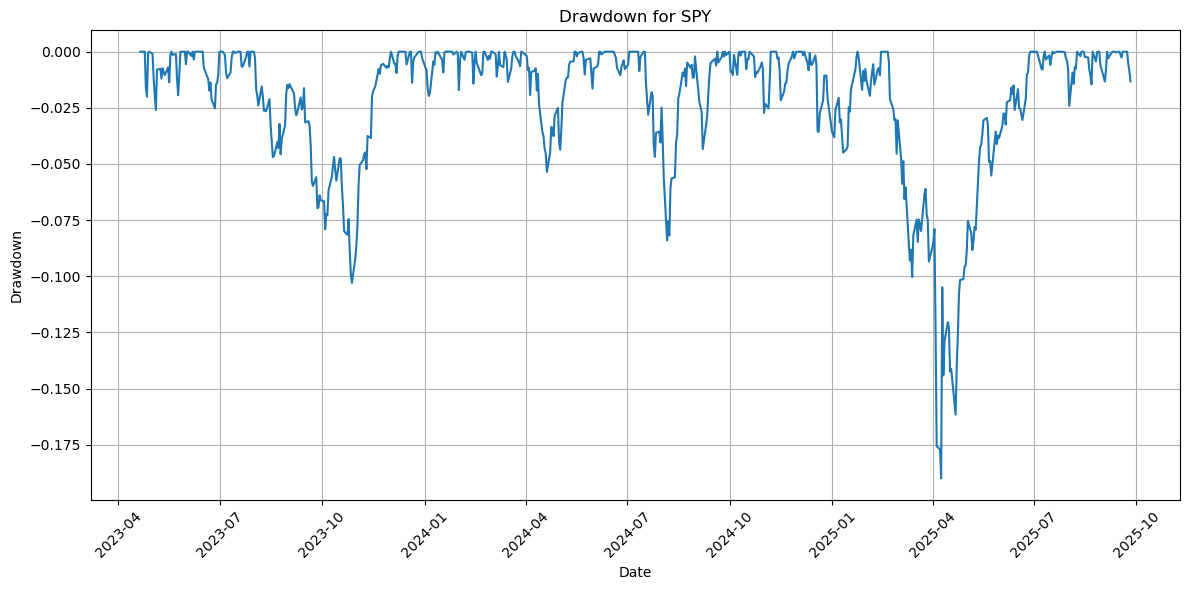

In [1217]:
# plot drawdown_spy
plt.figure(figsize=(12, 6))
plt.plot(drawdown_spy)
plt.title('Drawdown for SPY')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1218]:
# 3
daily_returns_strategies = df_total_strategies_sorted.groupby(['Month', 'Year', 'Day']).agg({'Profit_pct_100': 'sum'}).reset_index()

# Ordina per data (opzionale, ma utile per il plot)
daily_returns_strategies = daily_returns_strategies.sort_values(['Year', 'Month', 'Day'])

# Crea una colonna data per l'asse x
daily_returns_strategies['Date'] = pd.to_datetime(daily_returns_strategies[['Year', 'Month', 'Day']])

# drop Month	Year	Day
daily_returns_strategies = daily_returns_strategies.drop(columns=['Month', 'Year', 'Day'])

# set index to Date
daily_returns_strategies = daily_returns_strategies.set_index('Date')

daily_returns_strategies.head()

,Profit_pct_100
Date,
2023-04-17,5.309525
2023-04-18,-0.045975
2023-04-19,-0.554475
2023-04-20,-0.067050
2023-04-21,0.450600


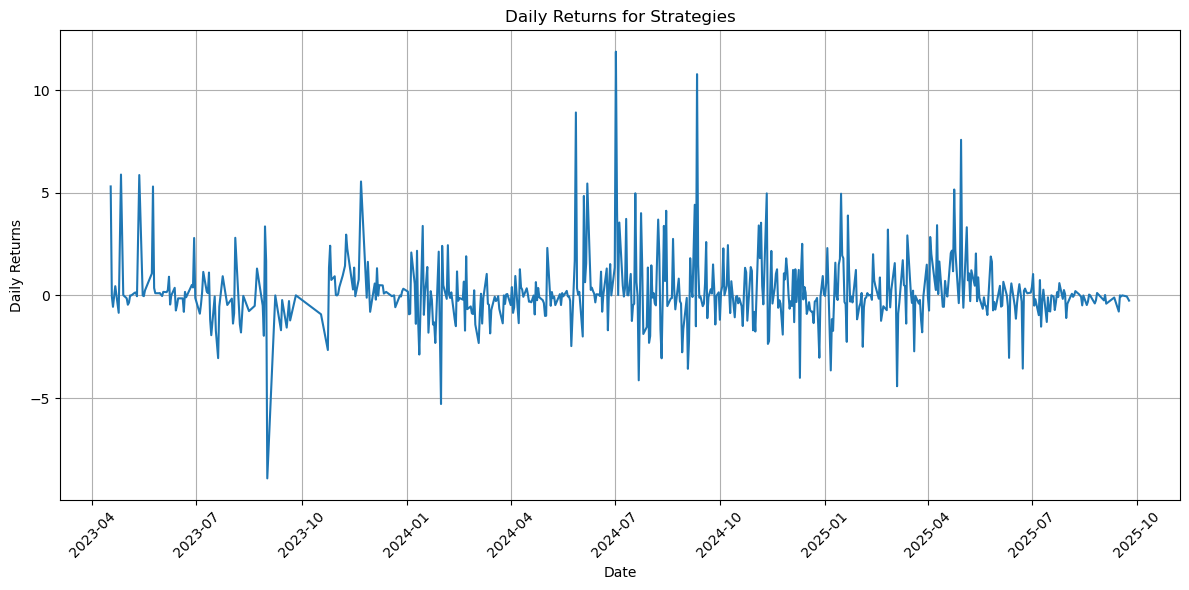

In [1219]:
# plot Profit_pct_100
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_strategies.index, daily_returns_strategies['Profit_pct_100'])
plt.title('Daily Returns for Strategies')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Download here the csv daily_returns_spy and daily_returns_strategies for quantstats analysis

## Don't forget to change the code at the beginning of the notebook before downloading the csv files

In [1220]:
# # Get paths from environment variables
# path_daily_returns_spy = os.getenv('path_daily_returns_spy')
# path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# # download daily_returns_spy and daily_returns_strategies to csv files
# daily_returns_spy.to_csv(path_daily_returns_spy, index=True, sep=';')
# daily_returns_strategies.to_csv(path_daily_returns_strategies, index=True, sep=';')

In [1221]:
# df_total_strategies_sorted.head()

## Below cell can be used only if we use the quantstats version of data at the beginning of the notebook

In [1222]:
# # Use only with quantstats version of the notebook

# cumulative_returns_strategies = (1 + daily_returns_strategies).cumprod()  # here in internet they add -1 

# cumulative_max_strategies = cumulative_returns_strategies.cummax()

# drawdown_strategies = (cumulative_returns_strategies - cumulative_max_strategies) / cumulative_max_strategies

# max_drawdown_strategies = drawdown_strategies.min().min()
# print(f"Max Drawdown: {max_drawdown_strategies:.2%}")
# # print(f"Max Drawdown: {max_drawdown_strategies:.2%}")

## Pyfolio analysis (to complete.. see separate notebook for the full analysis)

In [1223]:
# from pyfolio.plotting import (plot_perf_stats, show_perf_stats)
# from pyfolio.timeseries import perf_stats

In [1224]:
# # df_total_strategies keep only column Profit_pct_100 and drop na values
# df_total_strategies = df_total_strategies[['Profit_pct_100']].dropna()

# # df combined_data_spy keep only column daily_return and drop na values
# combined_data_spy = combined_data_spy[['daily_return']].dropna()

In [1225]:
# df_total_strategies.head()
# combined_data_spy.sample(10)

In [1226]:
# combined_data_spy.info()

In [1227]:
# # remove nan values
# returns = df_total_strategies['Profit_pct_100']
# factor_returns = combined_data_spy['daily_return']

# perf_stats(returns=returns, factor_returns=factor_returns)


## Final Download

In [1228]:
# Get download path from environment variables
path_prop_download = os.getenv('path_prop_download')

# # download the file as CSV
# df.to_csv(os.path.join(path_prop_download, 'full_db', '250930_PROP_full_history_db.csv'), index=False, sep=';')